In [57]:
# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [1]:
# For data manipulations
import numpy as np
import pandas as pd
import scipy.stats as stats
import plotly.graph_objects as go
# For data visualizations
import matplotlib.pyplot as plt
import seaborn as sns
# For interactive analysis
from ipywidgets import interact

In [2]:
# Reading the dataset
data_1 = pd.read_csv("Agri Project Data With Outlier.csv")

In [3]:
# Getting to know the informations of the dataset i.e., the data type and number of non-null values in each column
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   float64
 1   Phosphorus   2200 non-null   float64
 2   Potassium    2200 non-null   float64
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH           2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   object 
dtypes: float64(7), object(1)
memory usage: 137.6+ KB


In [4]:
# Getting the dimensions of the dataset
print("Shape of the dataset :", data_1.shape)

Shape of the dataset : (2200, 8)


In [5]:
# Checking the first 5 rows & columns of the dataset
data_1.head()

Nitrogen  Phosphorus  Potassium  Temperature  Humidity    pH  Rainfall  \
0      90.0        42.0       43.0        20.88     82.00  6.50    202.94   
1      85.0        58.0       41.0        21.77     80.32  7.04    226.66   
2      60.0        55.0       44.0        23.00     82.32  7.84    263.96   
3      74.0        35.0       40.0        26.49     80.16  6.98    242.86   
4      78.0        42.0       42.0        20.13     81.60  7.63    262.72   

   Crop  
0  rice  
1  rice  
2  rice  
3  rice  
4  rice

In [6]:
# Checking the missing values as individual
data_1.isnull()

Nitrogen  Phosphorus  Potassium  Temperature  Humidity     pH  Rainfall  \
0        False       False      False        False     False  False     False   
1        False       False      False        False     False  False     False   
2        False       False      False        False     False  False     False   
3        False       False      False        False     False  False     False   
4        False       False      False        False     False  False     False   
...        ...         ...        ...          ...       ...    ...       ...   
2195     False       False      False        False     False  False     False   
2196     False       False      False        False     False  False     False   
2197     False       False      False        False     False  False     False   
2198     False       False      False        False     False  False     False   
2199     False       False      False        False     False  False     False   

       Crop  
0     False  
1     False  
2     False  
3     False  
4     False  
...     ...  
2195  False  
2196  False  
2197  False  
2198  False  
2199  False  

[2200 rows x 8 columns]

In [7]:
# Checking the missing values as individual
missing_values = pd.isnull(data_1)     
data_1[missing_values] 

Nitrogen  Phosphorus  Potassium  Temperature  Humidity  pH  Rainfall  \
0          NaN         NaN        NaN          NaN       NaN NaN       NaN   
1          NaN         NaN        NaN          NaN       NaN NaN       NaN   
2          NaN         NaN        NaN          NaN       NaN NaN       NaN   
3          NaN         NaN        NaN          NaN       NaN NaN       NaN   
4          NaN         NaN        NaN          NaN       NaN NaN       NaN   
...        ...         ...        ...          ...       ...  ..       ...   
2195       NaN         NaN        NaN          NaN       NaN NaN       NaN   
2196       NaN         NaN        NaN          NaN       NaN NaN       NaN   
2197       NaN         NaN        NaN          NaN       NaN NaN       NaN   
2198       NaN         NaN        NaN          NaN       NaN NaN       NaN   
2199       NaN         NaN        NaN          NaN       NaN NaN       NaN   

     Crop  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN  
...   ...  
2195  NaN  
2196  NaN  
2197  NaN  
2198  NaN  
2199  NaN  

[2200 rows x 8 columns]

In [8]:
# Checking the missing values as displaying data only with Crop = NaN (Not A Number)
missing_crop = pd.isnull(data_1["Crop"])     
data_1[missing_crop] 

Empty DataFrame
Columns: [Nitrogen, Phosphorus, Potassium, Temperature, Humidity, pH, Rainfall, Crop]
Index: []

In [9]:
# Checking the missing values as sum of the dataset
data_1.isnull().sum()

Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH             0
Rainfall       0
Crop           0
dtype: int64

In [11]:
# Getting the number of rows in the dataset
num_rows = data_1.shape[0]
print("Number of rows:", num_rows)

# Getting the number of columns in the dataset
num_columns = data_1.shape[1]
print("Number of columns:", num_columns)

Number of rows: 2200
Number of columns: 8


In [12]:
# Getting the names of columns in the dataset
data_columns =list(data_1.columns)
print("List of Columns in dataset : ", data_columns)

List of Columns in dataset :  ['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'pH', 'Rainfall', 'Crop']


In [13]:
# Getting the number of columns in the dataset
column_num = len(data_1.columns)
print("Number of Columns in our dataset : ",column_num)

Number of Columns in our dataset :  8


In [14]:
# Getting the names of crops in the dataset
crop_yields = list(data_1["Crop"].unique())
print("List of Crops in dataset : ", crop_yields)

List of Crops in dataset :  ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas', 'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate', 'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple', 'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee']


In [15]:
# Getting the number of crops in the dataset
crop_numbers = len(data_1["Crop"].unique())
print("Number of various crops: ", crop_numbers)

Number of various crops:  22


In [16]:
# Checking the data types of the column values of the dataset
data_1.dtypes

Nitrogen       float64
Phosphorus     float64
Potassium      float64
Temperature    float64
Humidity       float64
pH             float64
Rainfall       float64
Crop            object
dtype: object

In [17]:
# Checking for duplicated values as individual in the dataset
data_1.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2195    False
2196    False
2197    False
2198    False
2199    False
Length: 2200, dtype: bool

In [18]:
# Check for duplicated values as sum in the dataset
duplicates = data_1.duplicated()
print("Number of duplicate rows:", duplicates.sum())

Number of duplicate rows: 0


In [19]:
# Calculate the frequency distribution of a "Crop" column in the dataset
#Checking the crops present in the dataset
data_1['Crop'].value_counts()

Crop
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

In [22]:
# Calculating descriptive statistics on the datatset before deleting Outliers
data_1.describe()

Nitrogen   Phosphorus    Potassium  Temperature     Humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616136    71.481877   
std      36.917334    32.985883    50.647931     5.063700    22.263811   
min       0.000000     5.000000     5.000000     8.830000    14.260000   
25%      21.000000    28.000000    20.000000    22.770000    60.262500   
50%      37.000000    51.000000    32.000000    25.600000    80.470000   
75%      84.250000    68.000000    49.000000    28.560000    89.950000   
max     140.000000   145.000000   205.000000    43.680000    99.980000   

                pH     Rainfall  
count  2200.000000  2200.000000  
mean      6.469445   103.463691  
std       0.773905    54.958311  
min       3.500000    20.210000  
25%       5.970000    64.552500  
50%       6.425000    94.865000  
75%       6.920000   124.270000  
max       9.940000   298.560000

In [23]:
# Getting the descriptive statistics of "Crops" column of the dataset
data_1["Crop"].describe()

count     2200
unique      22
top       rice
freq       100
Name: Crop, dtype: object

In [25]:
# Finding the covariance between the climatic and soil requirements
data = data_1.drop('Crop', axis=1)
data.cov()

Nitrogen   Phosphorus    Potassium  Temperature    Humidity  \
Nitrogen     1362.889537  -281.860096  -262.727147     4.954129  156.729591   
Phosphorus   -281.860096  1088.068460  1229.998647   -21.302754  -87.196025   
Potassium    -262.727147  1229.998647  2565.212869   -41.134230  215.216655   
Temperature     4.954129   -21.302754   -41.134230    25.641060   23.147892   
Humidity      156.729591   -87.196025   215.216655    23.147892  495.677267   
pH              2.764522    -3.523428    -6.642932    -0.070220   -0.146485   
Rainfall      119.747730  -115.731526  -148.809341    -8.371593  115.528545   

                   pH     Rainfall  
Nitrogen     2.764522   119.747730  
Phosphorus  -3.523428  -115.731526  
Potassium   -6.642932  -148.809341  
Temperature -0.070220    -8.371593  
Humidity    -0.146485   115.528545  
pH           0.598928    -4.643130  
Rainfall    -4.643130  3020.415938

In [26]:
# Finding the correlation analysis between the climatic and soil requirements
data.corr()

Nitrogen  Phosphorus  Potassium  Temperature  Humidity        pH  \
Nitrogen     1.000000   -0.231460  -0.140512     0.026501  0.190687  0.096761   
Phosphorus  -0.231460    1.000000   0.736232    -0.127538 -0.118732 -0.138022   
Potassium   -0.140512    0.736232   1.000000    -0.160389  0.190860 -0.169477   
Temperature  0.026501   -0.127538  -0.160389     1.000000  0.205326 -0.017919   
Humidity     0.190687   -0.118732   0.190860     0.205326  1.000000 -0.008502   
pH           0.096761   -0.138022  -0.169477    -0.017919 -0.008502  1.000000   
Rainfall     0.059021   -0.063840  -0.053461    -0.030082  0.094418 -0.109167   

             Rainfall  
Nitrogen     0.059021  
Phosphorus  -0.063840  
Potassium   -0.053461  
Temperature -0.030082  
Humidity     0.094418  
pH          -0.109167  
Rainfall     1.000000

In [ ]:
Hypothesis Testing:

In [27]:
# Hypothesis 1: Doing the hypothesis testing of the crops i.e., "cotton" & "rice" in the dataset
Crops_in_dataset :  ['rice', 'maize', 'chickpea', 'pomegranate', 'banana', 'mango',  'coconut', 'cotton']
rice_data = data_1.loc[data_1["Crop"] == "rice"]
cotton_data = data_1.loc[data_1["Crop"] == "cotton"]
t, p = stats.ttest_ind(rice_data["Nitrogen"], cotton_data["Nitrogen"])
print("t-value:", t)
print("p-value:", p)
if p < 0.05:
    print("There is a statistically significant difference between the two crops.")
else:
    print("There is no statistically significant difference between the two crops.")

t-value: -22.74889722194593
p-value: 3.8489252207759e-57
There is a statistically significant difference between the two crops.


In [28]:
# Hypothesis 2: Doing the hypothesis testing of the crops i.e., "coconut" & "rice" in the dataset
Crops_in_dataset :  ['rice', 'maize', 'chickpea', 'pomegranate', 'banana', 'mango',  'coconut', 'cotton']
rice_data = data_1.loc[data_1["Crop"] == "rice"]
coconut_data = data_1.loc[data_1["Crop"] == "coconut"]
t, p = stats.ttest_ind(rice_data["Rainfall"], coconut_data["Rainfall"])
print("t-value:", t)
print("p-value:", p)
if p < 0.05:
    print("There is a statistically significant difference between the two crops.")
else:
    print("There is no statistically significant difference between the two crops.")

t-value: 13.378803060588613
p-value: 1.680228070624915e-29
There is a statistically significant difference between the two crops.


In [29]:
# Hypothesis 3: Doing the hypothesis testing of the crops i.e., "grapes" & "papaya" in the dataset
Crops_in_dataset :  ['grapes', 'maize', 'chickpea', 'apple', 'papaya', 'banana', 'mango',  'coconut', 'cotton']
grapes_data = data_1.loc[data_1["Crop"] == "grapes"]
papaya_data = data_1.loc[data_1["Crop"] == "papaya"]
t, p = stats.ttest_ind(grapes_data["Temperature"], papaya_data["Temperature"])
print("t-value:", t)
print("p-value:", p)
if p < 0.05:
    print("There is a statistically significant difference between the two crops.")
else:
    print("There is no statistically significant difference between the two crops.")

t-value: -8.527568601816094
p-value: 3.83000351935611e-15
There is a statistically significant difference between the two crops.


In [30]:
# Hypothesis 4: Doing the hypothesis testing of the crops i.e., "grapes" & "apple" in the dataset
Crops_in_dataset :  ['grapes', 'maize', 'chickpea', 'apple', 'papaya', 'banana', 'mango',  'coconut', 'cotton']
grapes_data = data_1.loc[data_1["Crop"] == "grapes"]
apple_data = data_1.loc[data_1["Crop"] == "apple"]
t, p = stats.ttest_ind(grapes_data["Potassium"], apple_data["Potassium"])
print("t-value:", t)
print("p-value:", p)
if p < 0.05:
    print("There is a statistically significant difference between the two crops.")
else:
    print("There is no statistically significant difference between the two crops.")

t-value: 0.4723518305046884
p-value: 0.6371958759917975
There is no statistically significant difference between the two crops.


In [31]:
# Hypothesis 5: Doing the hypothesis testing of the crops i.e., "grapes" & "apple" in the dataset
Crops_in_dataset :  ['grapes', 'maize', 'chickpea', 'apple', 'papaya', 'banana', 'mango',  'coconut', 'cotton']
grapes_data = data_1.loc[data_1["Crop"] == "grapes"]
apple_data = data_1.loc[data_1["Crop"] == "apple"]
t, p = stats.ttest_ind(grapes_data["Phosphorus"], apple_data["Phosphorus"])
print("t-value:", t)
print("p-value:", p)
if p < 0.05:
    print("There is a statistically significant difference between the two crops.")
else:
    print("There is no statistically significant difference between the two crops.")

t-value: -1.5158094537971918
p-value: 0.1311623683346354
There is no statistically significant difference between the two crops.


In [32]:
# Hypothesis 6: Doing the hypothesis testing of the crops i.e., "chickpea" & "kidneybeans" in the dataset
Crops_in_dataset :  ['grapes', 'kidneybeans', 'chickpea', 'apple', 'papaya', 'banana', 'mango',  'coconut', 'cotton']
chickpea_data = data_1.loc[data_1["Crop"] == "chickpea"]
kidneybeans_data = data_1.loc[data_1["Crop"] == "kidneybeans"]
t, p = stats.ttest_ind(chickpea_data["Humidity"], kidneybeans_data["Humidity"])
print("t-value:", t)
print("p-value:", p)
if p < 0.05:
    print("There is a statistically significant difference between the two crops.")
else:
    print("There is no statistically significant difference between the two crops.")

t-value: -17.182400854952633
p-value: 4.174318607028061e-41
There is a statistically significant difference between the two crops.


In [33]:
# Hypothesis 7: Doing the hypothesis testing of the crops i.e., "mothbeans" & "mango" in the dataset
Crops_in_dataset :  ['mothbeans', 'kidneybeans', 'chickpea', 'apple', 'papaya', 'banana', 'mango',  'coconut', 'cotton']
mothbeans_data = data_1.loc[data_1["Crop"] == "mothbeans"]
mango_data = data_1.loc[data_1["Crop"] == "mango"]
t, p = stats.ttest_ind(mothbeans_data["pH"], mango_data["pH"])
print("t-value:", t)
print("p-value:", p)
if p < 0.05:
    print("There is a statistically significant difference between the two crops.")
else:
    print("There is no statistically significant difference between the two crops.")

t-value: 5.349080637392469
p-value: 2.4278707506079806e-07
There is a statistically significant difference between the two crops.


In [37]:
data.skew()

Nitrogen       0.509721
Phosphorus     1.010773
Potassium      2.375167
Temperature    0.184958
Humidity      -1.091705
pH             0.283805
Rainfall       0.965756
dtype: float64

In [38]:
data.kurtosis()

Nitrogen      -1.058240
Phosphorus     0.860279
Potassium      4.449354
Temperature    1.232472
Humidity       0.302127
pH             1.658025
Rainfall       0.607078
dtype: float64

In [39]:
print("Crops that require very High Ratio of Nitrogen Content in Soil:", data_1[data_1['Nitrogen'] > 120]['Crop'].unique())
print("Crops that require very Low Ratio of Nitrogen Content in Soil:", data_1[data_1['Nitrogen'] < 25]['Crop'].unique())
print("Crops that require very High Ratio of Phosphorous Content in Soil:", data_1[data_1['Phosphorus'] > 100]['Crop'].unique())
print("Crops that require very Low Ratio of Phosphorous Content in Soil:", data_1[data_1['Phosphorus'] < 10]['Crop'].unique())
print("Crops that require very High Ratio of Potassium Content in Soil:", data_1[data_1['Potassium'] > 200]['Crop'].unique())
print("Crops that require very Low Ratio of Potassium Content in Soil:", data_1[data_1['Potassium'] < 100]['Crop'].unique())
print("Crops that require very High Rainfall:", data_1[data_1['Rainfall'] > 200]['Crop'].unique())
print("Crops that require very Low Rainfall:", data_1[data_1['Rainfall'] < 50]['Crop'].unique())
print("Crops that require very Low Temperature:", data_1[data_1['Temperature'] < 10]['Crop'].unique())
print("Crops that require very High Temperature:", data_1[data_1['Temperature'] > 40]['Crop'].unique())
print("Crops that require very Low Humidity:", data_1[data_1['Humidity'] < 20]['Crop'].unique())
print("Crops that require very Low Humidity:", data_1[data_1['Humidity'] > 80]['Crop'].unique())
print("Crops that require very Low pH:", data_1[data_1['pH'] < 4]['Crop'].unique())
print("Crops that require very High pH:", data_1[data_1['pH'] > 9]['Crop'].unique())

Crops that require very High Ratio of Nitrogen Content in Soil: ['cotton']
Crops that require very Low Ratio of Nitrogen Content in Soil: ['chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean' 'blackgram'
 'lentil' 'pomegranate' 'mango' 'grapes' 'apple' 'orange' 'coconut']
Crops that require very High Ratio of Phosphorous Content in Soil: ['grapes' 'apple']
Crops that require very Low Ratio of Phosphorous Content in Soil: ['pomegranate' 'watermelon' 'muskmelon' 'orange' 'coconut']
Crops that require very High Ratio of Potassium Content in Soil: ['grapes' 'apple']
Crops that require very Low Ratio of Potassium Content in Soil: ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango'
 'watermelon' 'muskmelon' 'orange' 'papaya' 'coconut' 'cotton' 'jute'
 'coffee']
Crops that require very High Rainfall: ['rice' 'papaya' 'coconut']
Crops that require very Low Rainfall: ['mothbeans' 'mungbean' 'lentil' 'watermelo

In [45]:
# Checking the detailed statistics for each crop using interactive analysis

@interact
def summary(crops = list(data_1["Crop"].value_counts().index)):
    x = data_1[data_1["Crop"]== crops]
    y = data_1.drop(["Crop"],axis=1)
    m = []
    m.append(y)
    for i in y:
        print("Statistics for", i , ":")    
        print("Minimum", i , "required:", x[i].min())
        print("Average", i ,"required:", x[i].mean())
        print("Maximum" , i ,"required:", x[i].max())
        print("...........................................")

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'chickpea', 'kidneybeans', 'pige…

In [46]:
# Comparing Average requirement and conditions for each crop using interactive analysis

@interact
def compare(conditions = ['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'pH', 'Humidity', 'Rainfall']):
    print("Average Value for", conditions, "is {0:.2f}".format(data_1[conditions].mean()))
    print("...........................................")
    print("Rice : {0:.2f}".format(data_1[(data_1["Crop"] == 'rice')][conditions].mean()))
    print("Black grams : {0:.2f}".format(data_1[(data_1["Crop"] == 'blackgram')][conditions].mean()))
    print("Banana : {0:.2f}".format(data_1[(data_1["Crop"] == 'banana')][conditions].mean()))
    print("Jute : {0:.2f}".format(data_1[(data_1["Crop"] == 'jute')][conditions].mean()))
    print("Coconut : {0:.2f}".format(data_1[(data_1["Crop"] == 'coconut')][conditions].mean()))
    print("Apple : {0:.2f}".format(data_1[(data_1["Crop"] == 'apple')][conditions].mean()))
    print("Papaya : {0:.2f}".format(data_1[(data_1["Crop"] == 'papaya')][conditions].mean()))
    print("Muskmelon : {0:.2f}".format(data_1[(data_1["Crop"] == 'muskmelon')][conditions].mean()))
    print("Grapes : {0:.2f}".format(data_1[(data_1["Crop"] == 'grapes')][conditions].mean()))
    print("Watermelon : {0:.2f}".format(data_1[(data_1["Crop"] == 'watermelon')][conditions].mean()))
    print("Kidney Beans : {0:.2f}".format(data_1[(data_1["Crop"] == 'kidneybeans')][conditions].mean()))
    print("Mung Beans : {0:.2f}".format(data_1[(data_1["Crop"] == 'mungbean')][conditions].mean()))
    print("Oranges : {0:.2f}".format(data_1[(data_1["Crop"] == 'orange')][conditions].mean()))
    print("Chick Peas : {0:.2f}".format(data_1[(data_1["Crop"] == 'chickpea')][conditions].mean()))
    print("Lentils : {0:.2f}".format(data_1[(data_1["Crop"] == 'lentil')][conditions].mean()))
    print("Cotton : {0:.2f}".format(data_1[(data_1["Crop"] == 'cotton')][conditions].mean()))
    print("Maize : {0:.2f}".format(data_1[(data_1["Crop"] == 'maize')][conditions].mean()))
    print("Moth Beans : {0:.2f}".format(data_1[(data_1["Crop"] == 'mothbeans')][conditions].mean()))
    print("Pigeon Peas : {0:.2f}".format(data_1[(data_1["Crop"] == 'pigeonpeas')][conditions].mean()))
    print("Mango : {0:.2f}".format(data_1[(data_1["Crop"] == 'mango')][conditions].mean()))
    print("Pomegranate : {0:.2f}".format(data_1[(data_1["Crop"] == 'pomegranate')][conditions].mean()))
    print("Coffee : {0:.2f}".format(data_1[(data_1["Crop"] == 'coffee')][conditions].mean()))

interactive(children=(Dropdown(description='conditions', options=('Nitrogen', 'Phosphorus', 'Potassium', 'Temp…

In [47]:
# Checking the below and above Average Conditions using interactive analysis

@interact
def compare(conditions = ['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'pH', 'Humidity', 'Rainfall']):
    print("Crops that require greater than average :", conditions, '\n')
    print(data_1[data_1[conditions] > data_1[conditions].mean()]['Crop'].unique())
    print("...........................................")
    print("Crops that require less than average :", conditions, '\n')
    print(data_1[data_1[conditions] <= data_1[conditions].mean()]['Crop'].unique())  

interactive(children=(Dropdown(description='conditions', options=('Nitrogen', 'Phosphorus', 'Potassium', 'Temp…

In [48]:
# Checking which crop to be grown according to the season
print("Summer Crops: ")
print(data_1[(data_1['Temperature'] > 30) & (data_1['Humidity'] > 50)]['Crop'].unique())
print("...........................................")
print("Winter Crops: ")
print(data_1[(data_1['Temperature'] < 20) & (data_1['Humidity'] > 30)]['Crop'].unique())
print("...........................................")
print("Monsoon Crops: ")
print(data_1[(data_1['Rainfall'] > 200) & (data_1['Humidity'] > 30)]['Crop'].unique())

Summer Crops: 
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
...........................................
Winter Crops: 
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
...........................................
Monsoon Crops: 
['rice' 'papaya' 'coconut']


In [49]:
# Checking which crop to be grown according to the pH
print("Acidic Requirements: ")
print(data_1[(data_1['pH'] <= 6.99)]['Crop'].unique())
print("...........................................")
print("Normal Requirements: ")
print(data_1[(data_1['pH'] == 7.00)]['Crop'].unique())
print("...........................................")
print("Alkailic Requirements: ")
print(data_1[(data_1['pH'] >= 7.01)]['Crop'].unique())

Acidic Requirements: 
['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
...........................................
Normal Requirements: 
['maize' 'lentil' 'pomegranate' 'jute']
...........................................
Alkailic Requirements: 
['rice' 'chickpea' 'pigeonpeas' 'mothbeans' 'mungbean' 'blackgram'
 'lentil' 'pomegranate' 'orange' 'cotton' 'jute' 'coffee']


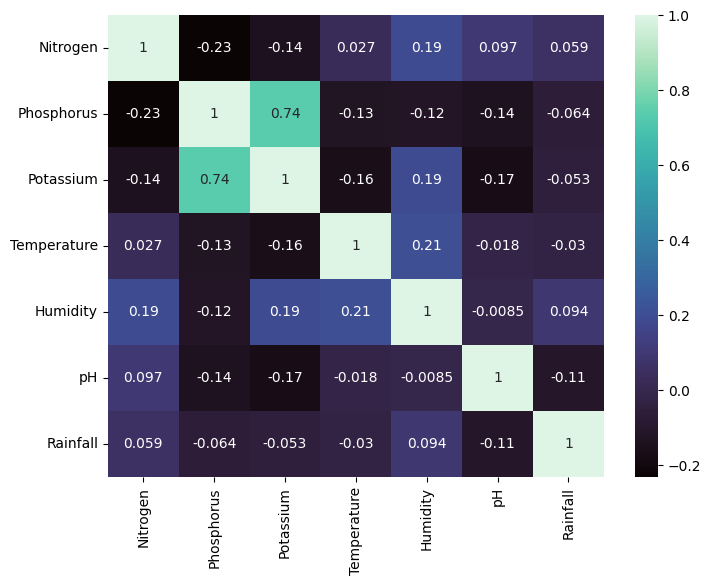

In [51]:
# Visualizing the correlation of variable
plt.figure(figsize = (8, 6))
cmap = sns.color_palette("mako", as_cmap = True)
sns.heatmap(data.corr(), annot = True, cmap = cmap)
plt.show()

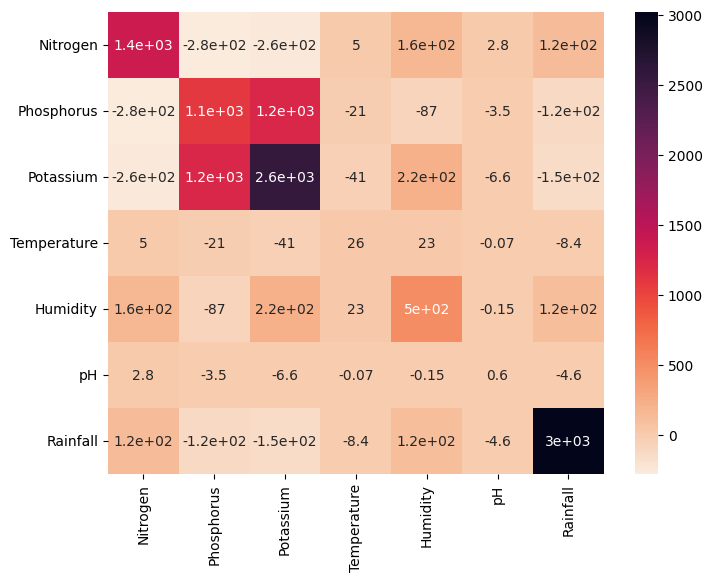

In [52]:
# Visualizing the correlation of variable
plt.figure(figsize = (8, 6))
cmap = sns.color_palette("rocket_r", as_cmap = True)
sns.heatmap(data.cov(), annot = True, cmap = cmap)
plt.show()

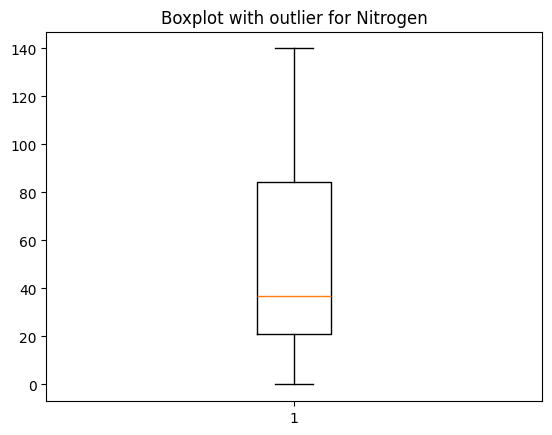

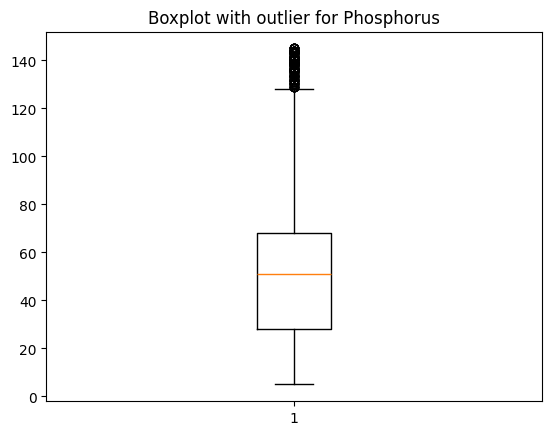

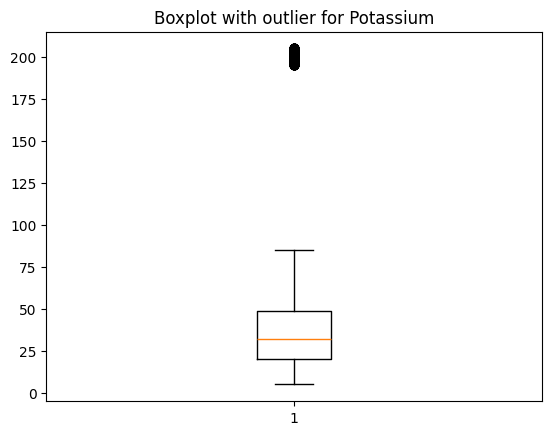

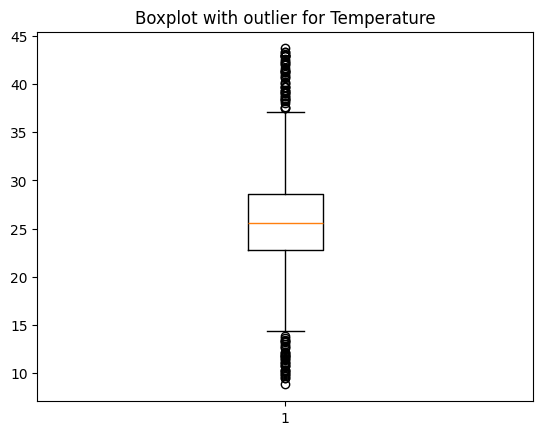

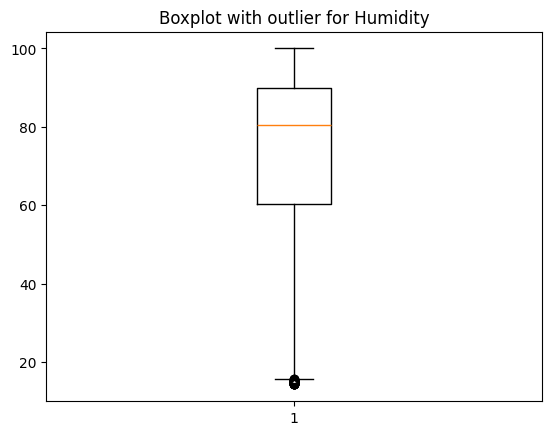

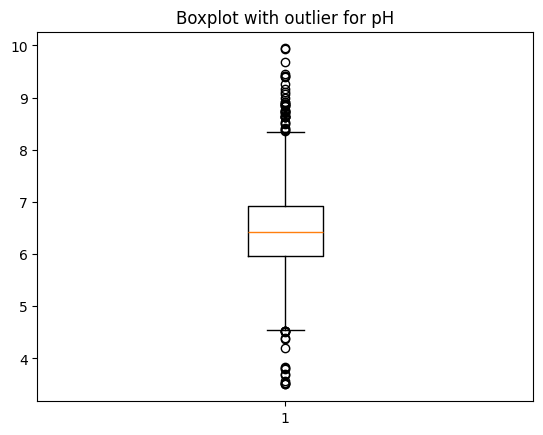

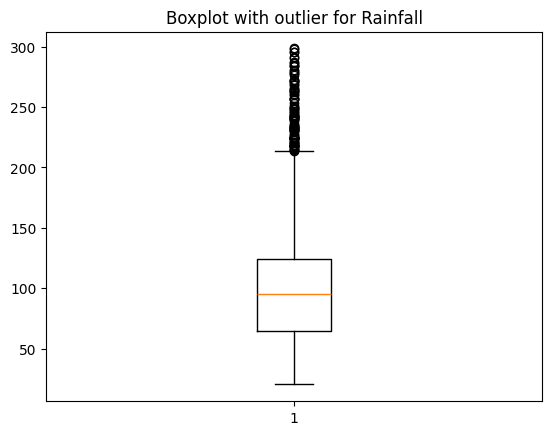

In [53]:
# Check for outliers in the variables using boxplot as individual in the dataset
data_columns = ['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'pH', 'Rainfall']
for column in data_columns:
    plt.boxplot(data_1[column])
    plt.title(f'Boxplot with outlier for {column}')
    plt.show()

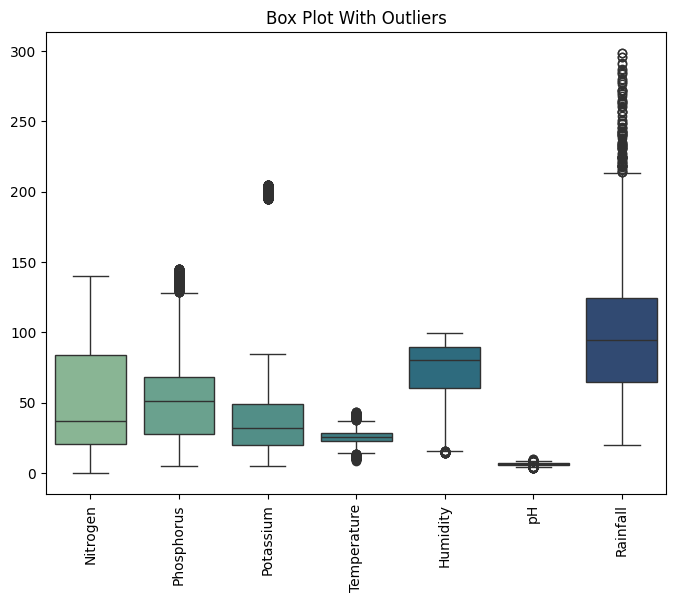

In [55]:
# Check for outliers in the variables using boxplot as a whole in the dataset
plt.figure(figsize=(8, 6))
sns.boxplot(data = data_1, orient="v", palette="crest")
plt.xticks(rotation = 90)
plt.title("Box Plot With Outliers")
plt.show()

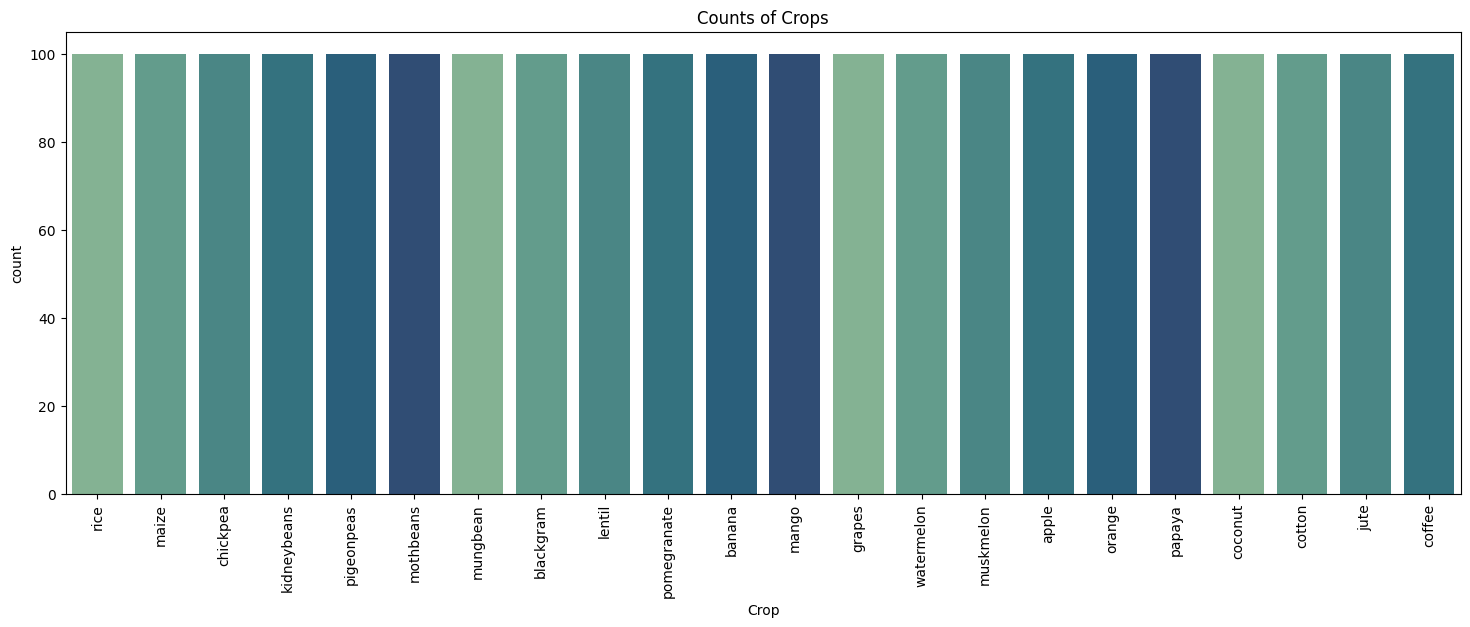

In [58]:
# Count of crops present in dataset using bar chart
plt.figure(figsize=(18, 6))
cmap = sns.color_palette("crest")
sns.countplot(x ="Crop", data = data_1, palette = cmap)
plt.xticks(rotation = 90)
plt.title("Counts of Crops")
plt.show()

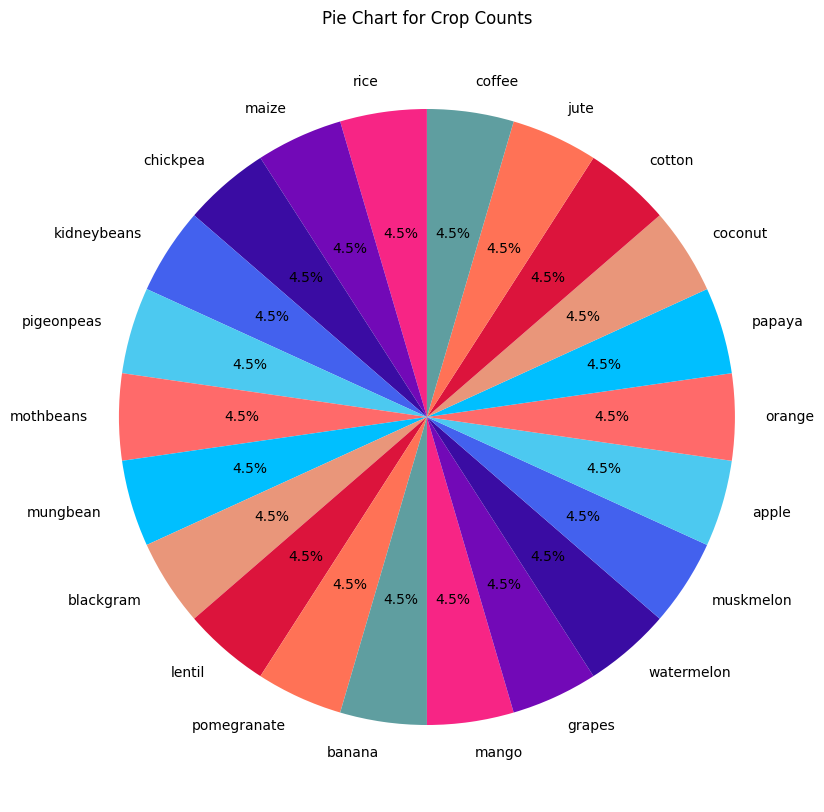

In [60]:
# Count of crops in data set using pie chart
counts = data_1['Crop'].value_counts()
plt.figure(figsize=(10, 10))
color = ["#F72585", "#7209B7", "#3A0CA3", "#4361EE", "#4CC9F0", "#FF6A6A", 
         "#00BFFF", "#E9967A", "#DC143C", "#FF7256", "#5F9EA0"]
counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors = color)
plt.title('Pie Chart for Crop Counts')
plt.ylabel('')
plt.show()

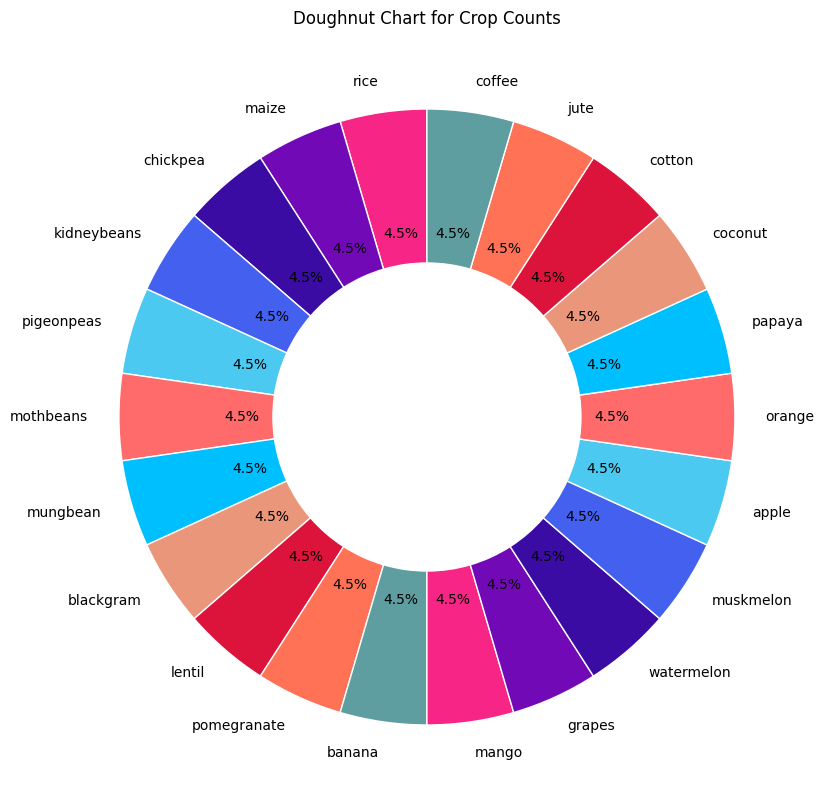

In [61]:
# Count of crops in data set using doughnut chart
counts = data_1['Crop'].value_counts()
fig, ax = plt.subplots(figsize=(10, 10))
color = ["#F72585", "#7209B7", "#3A0CA3", "#4361EE", "#4CC9F0", 
         "#FF6A6A", "#00BFFF", "#E9967A", "#DC143C", "#FF7256", "#5F9EA0"]
ax.pie(counts.values, labels=counts.index, autopct='%1.1f%%', 
       startangle=90, colors = color,
       wedgeprops={'width': 0.5, 'edgecolor': 'w'})
circle = plt.Circle((0, 0), 0.4, color='white')
fig.gca().add_artist(circle)
ax.set_title('Doughnut Chart for Crop Counts')
plt.show()

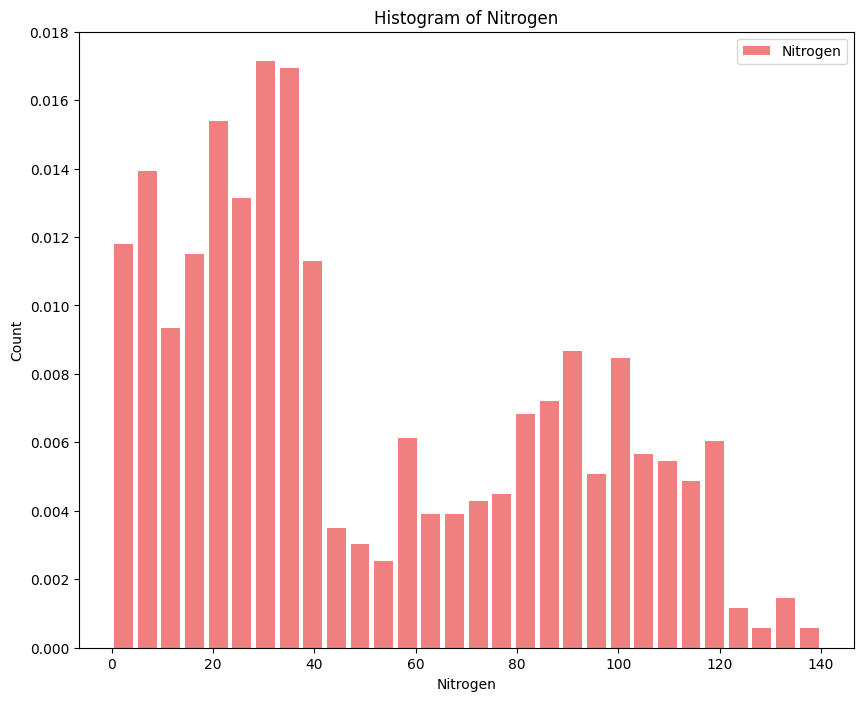

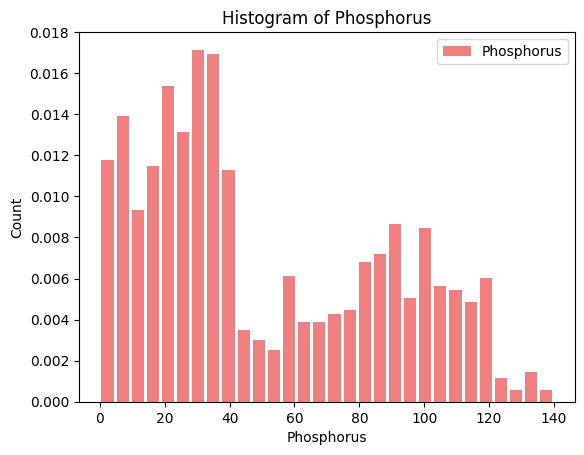

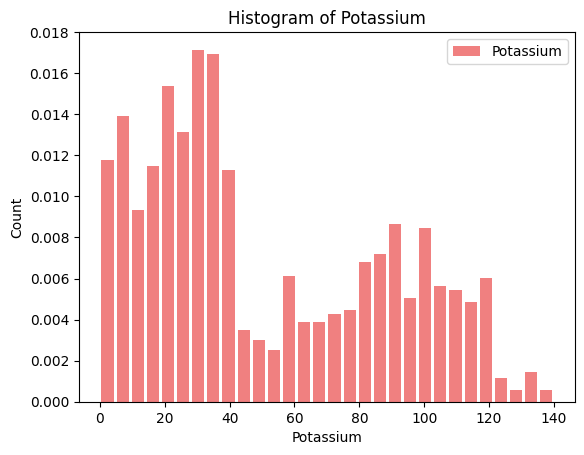

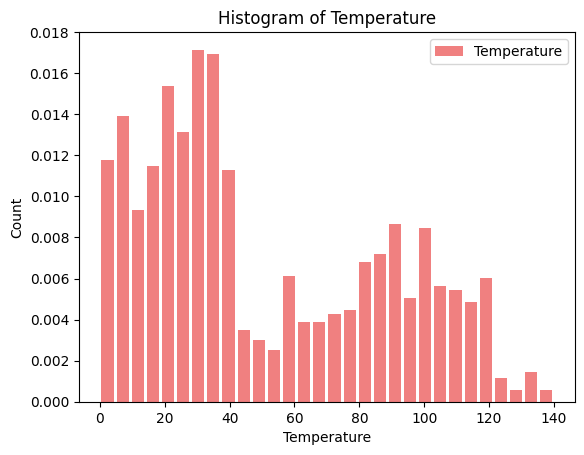

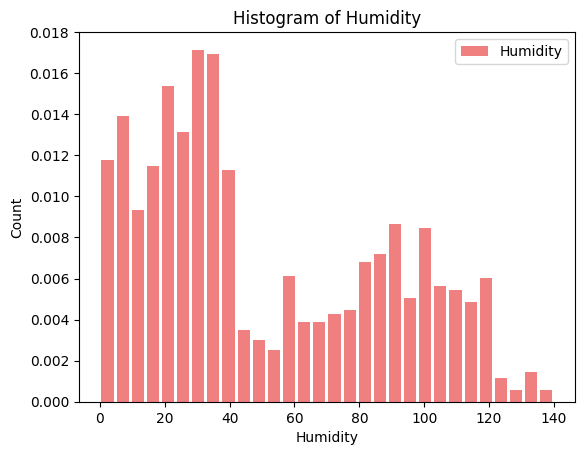

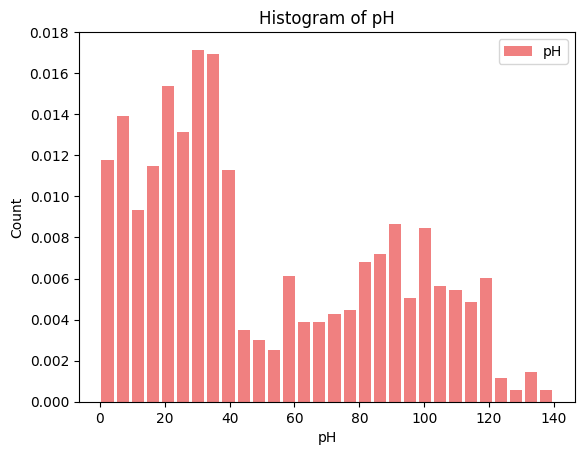

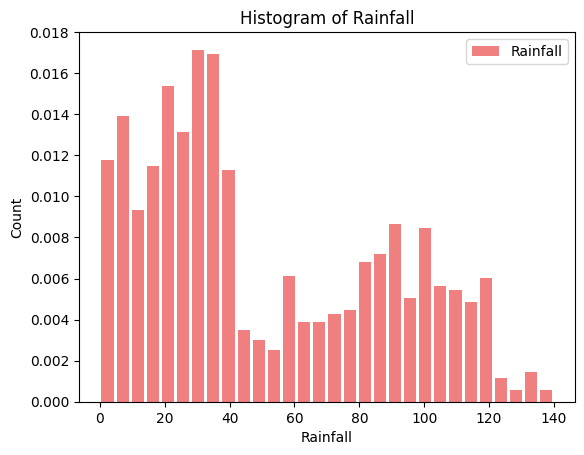

In [62]:
# Checking distribution using histogram with histtype = bar
x = data_1[column]
plt.figure(figsize=(10, 8))
colors = ["lightcoral"]
for column in data_1.columns[:-1]:
    plt.hist(x, bins = 30, density = True, histtype ='bar', color = colors, label = column, rwidth = 0.8)
    plt.legend(prop ={'size': 10})
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

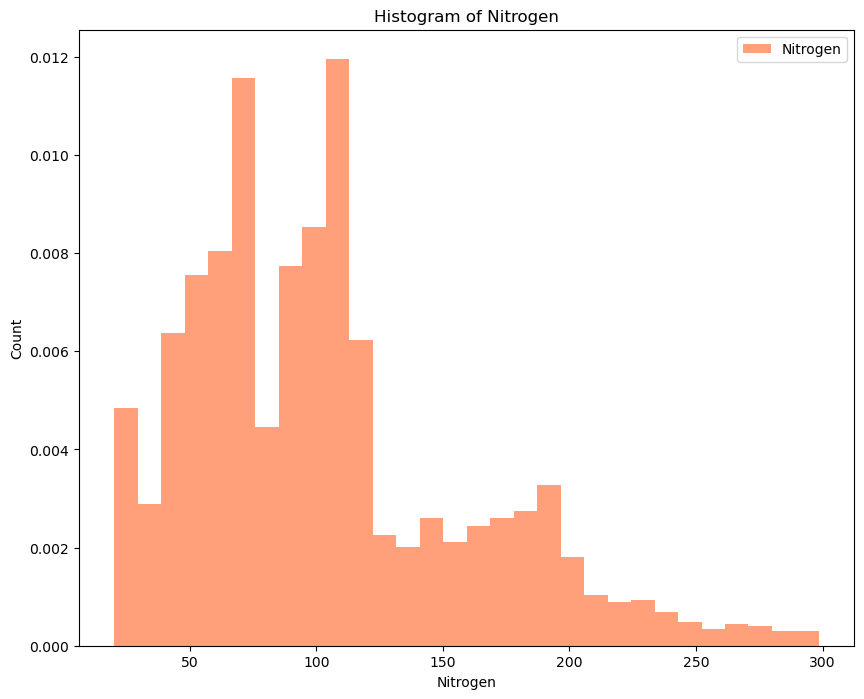

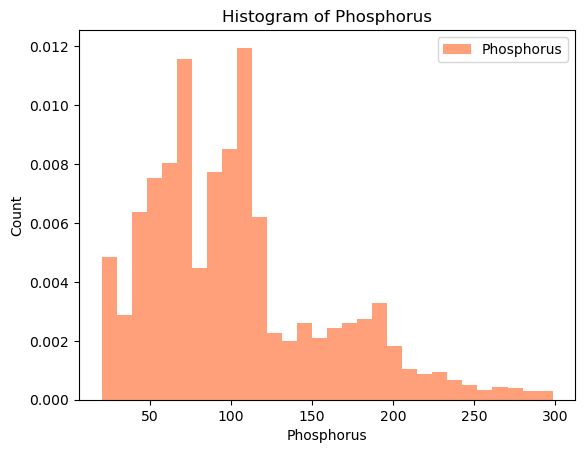

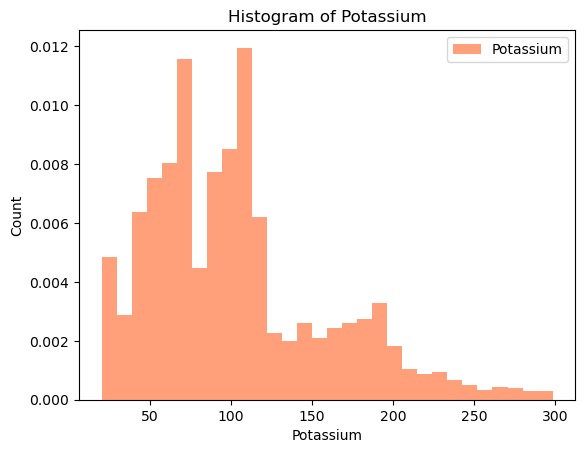

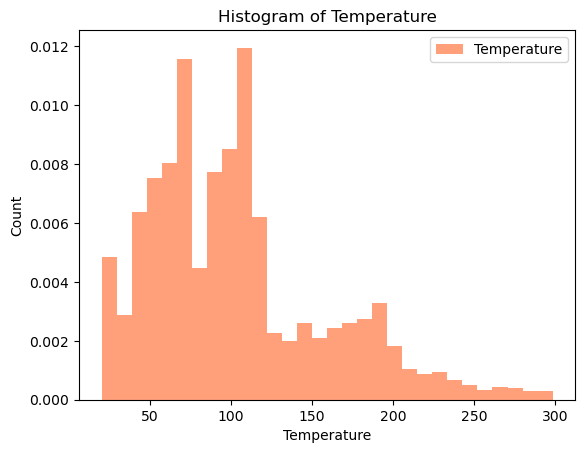

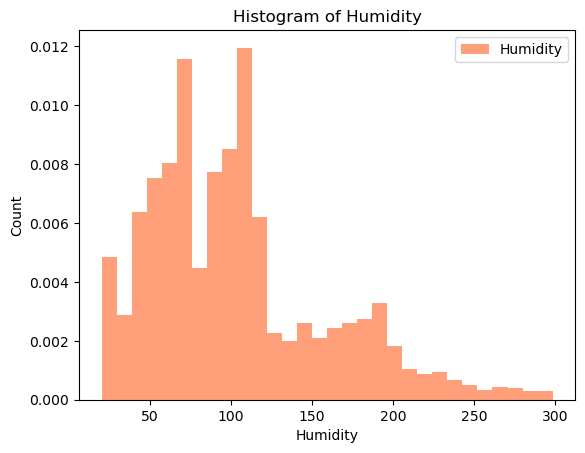

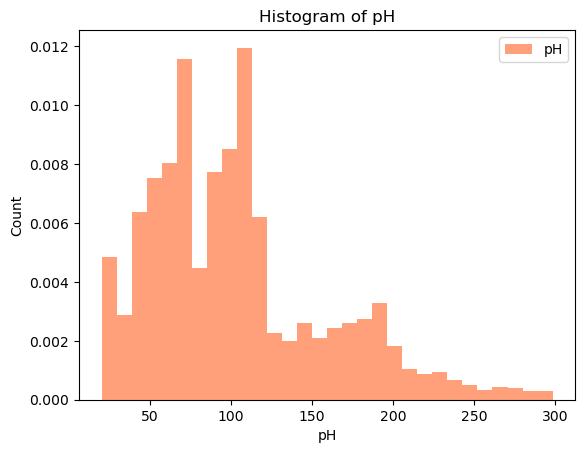

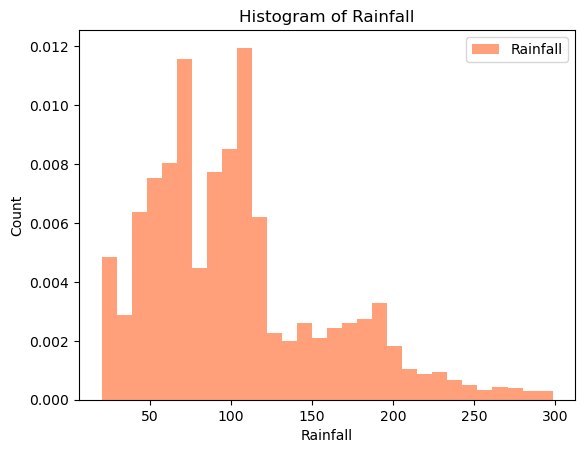

In [93]:
#Checking distribution using histogram with histtype = stepfilled
x = data_1[column]
plt.figure(figsize=(10, 8))
colors = ["lightsalmon"]
for column in data_1.columns[:-1]:
    plt.hist(x, bins = 30, density = True, histtype ='stepfilled', color = colors, label = column, rwidth = 0.8)
    plt.legend(prop ={'size': 10})
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

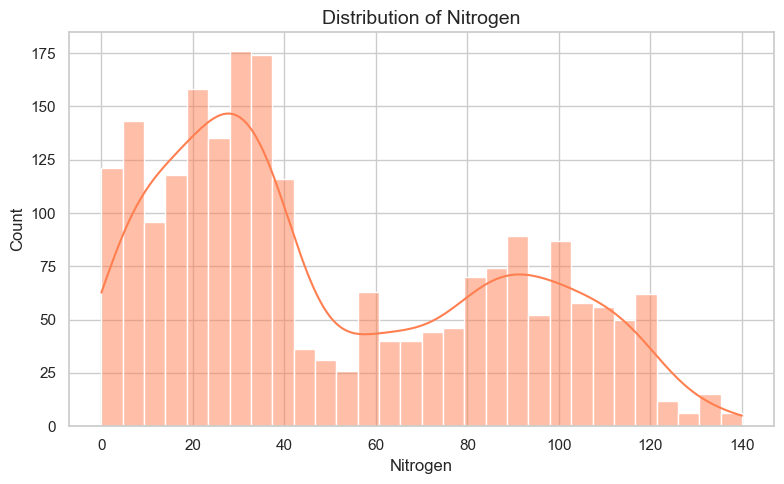

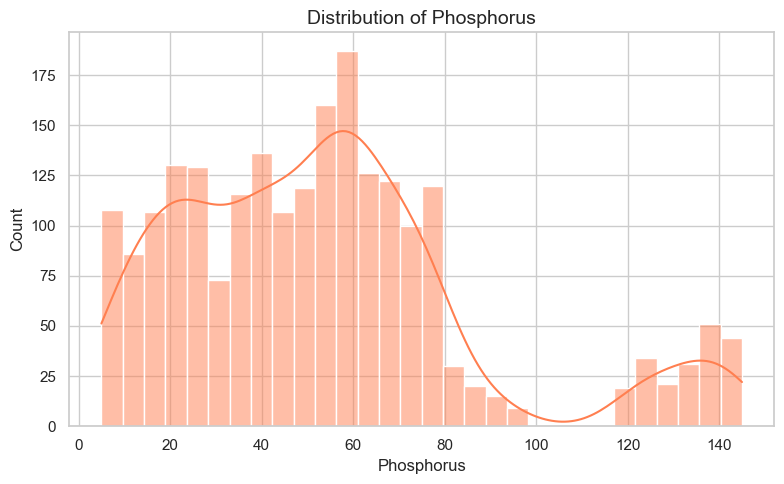

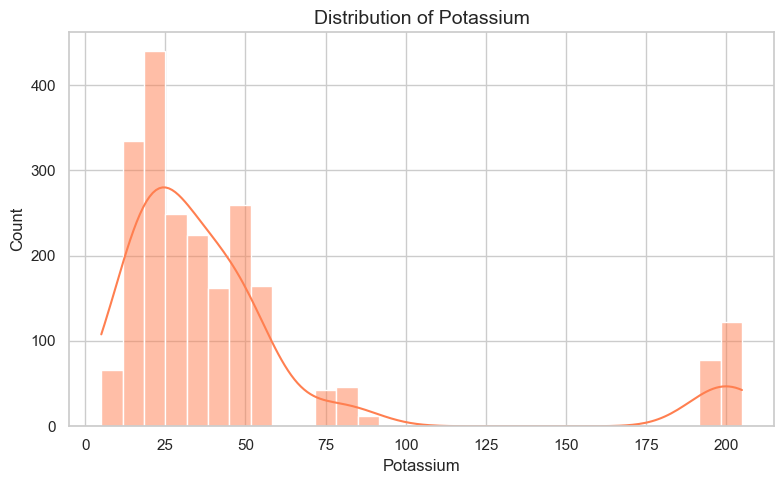

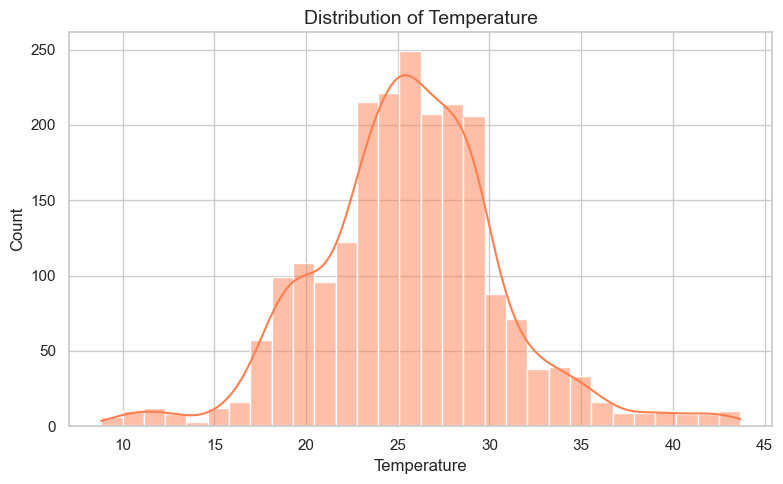

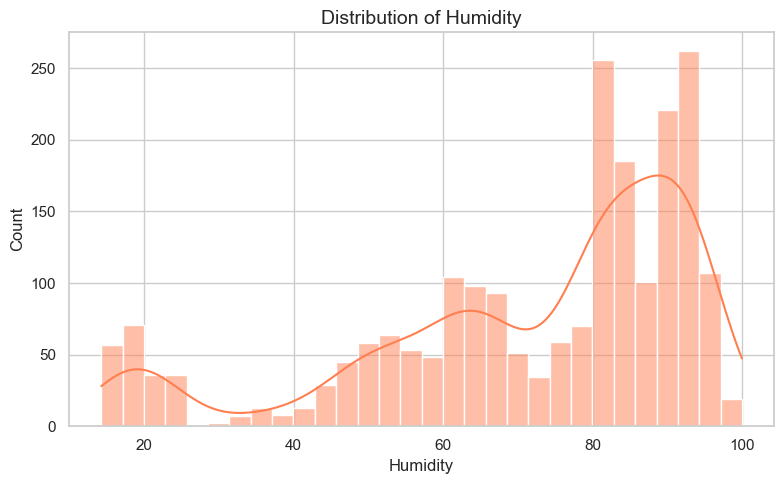

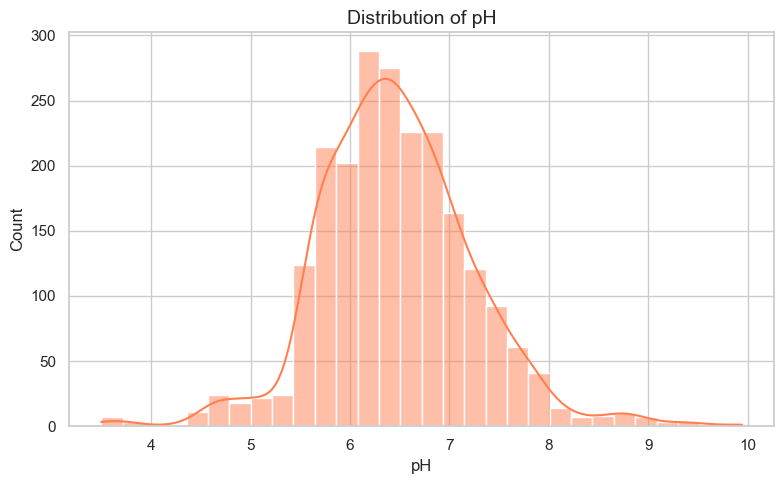

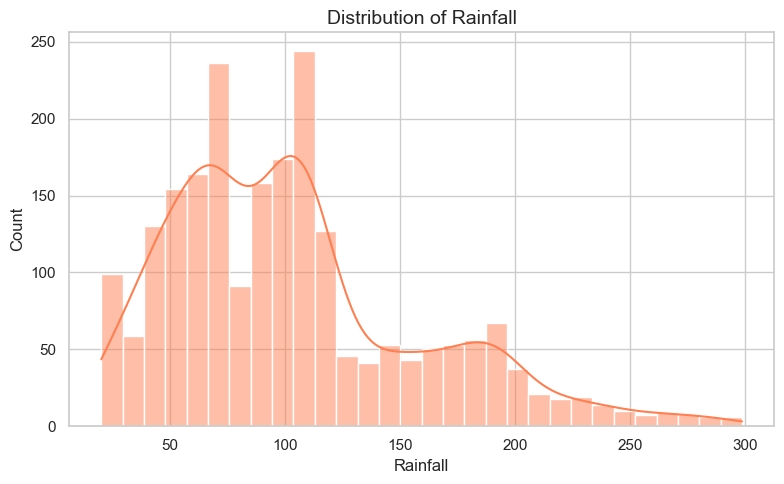

In [64]:
# Checking distribution using histogram with curve
sns.set_theme(style="whitegrid")
plot_color = "coral"
for column in data_1.columns[:-1]:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=data_1, x=column, bins=30, kde=True, color=plot_color)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.title(f'Distribution of {column}', fontsize=14)
    plt.tight_layout()
    plt.show()

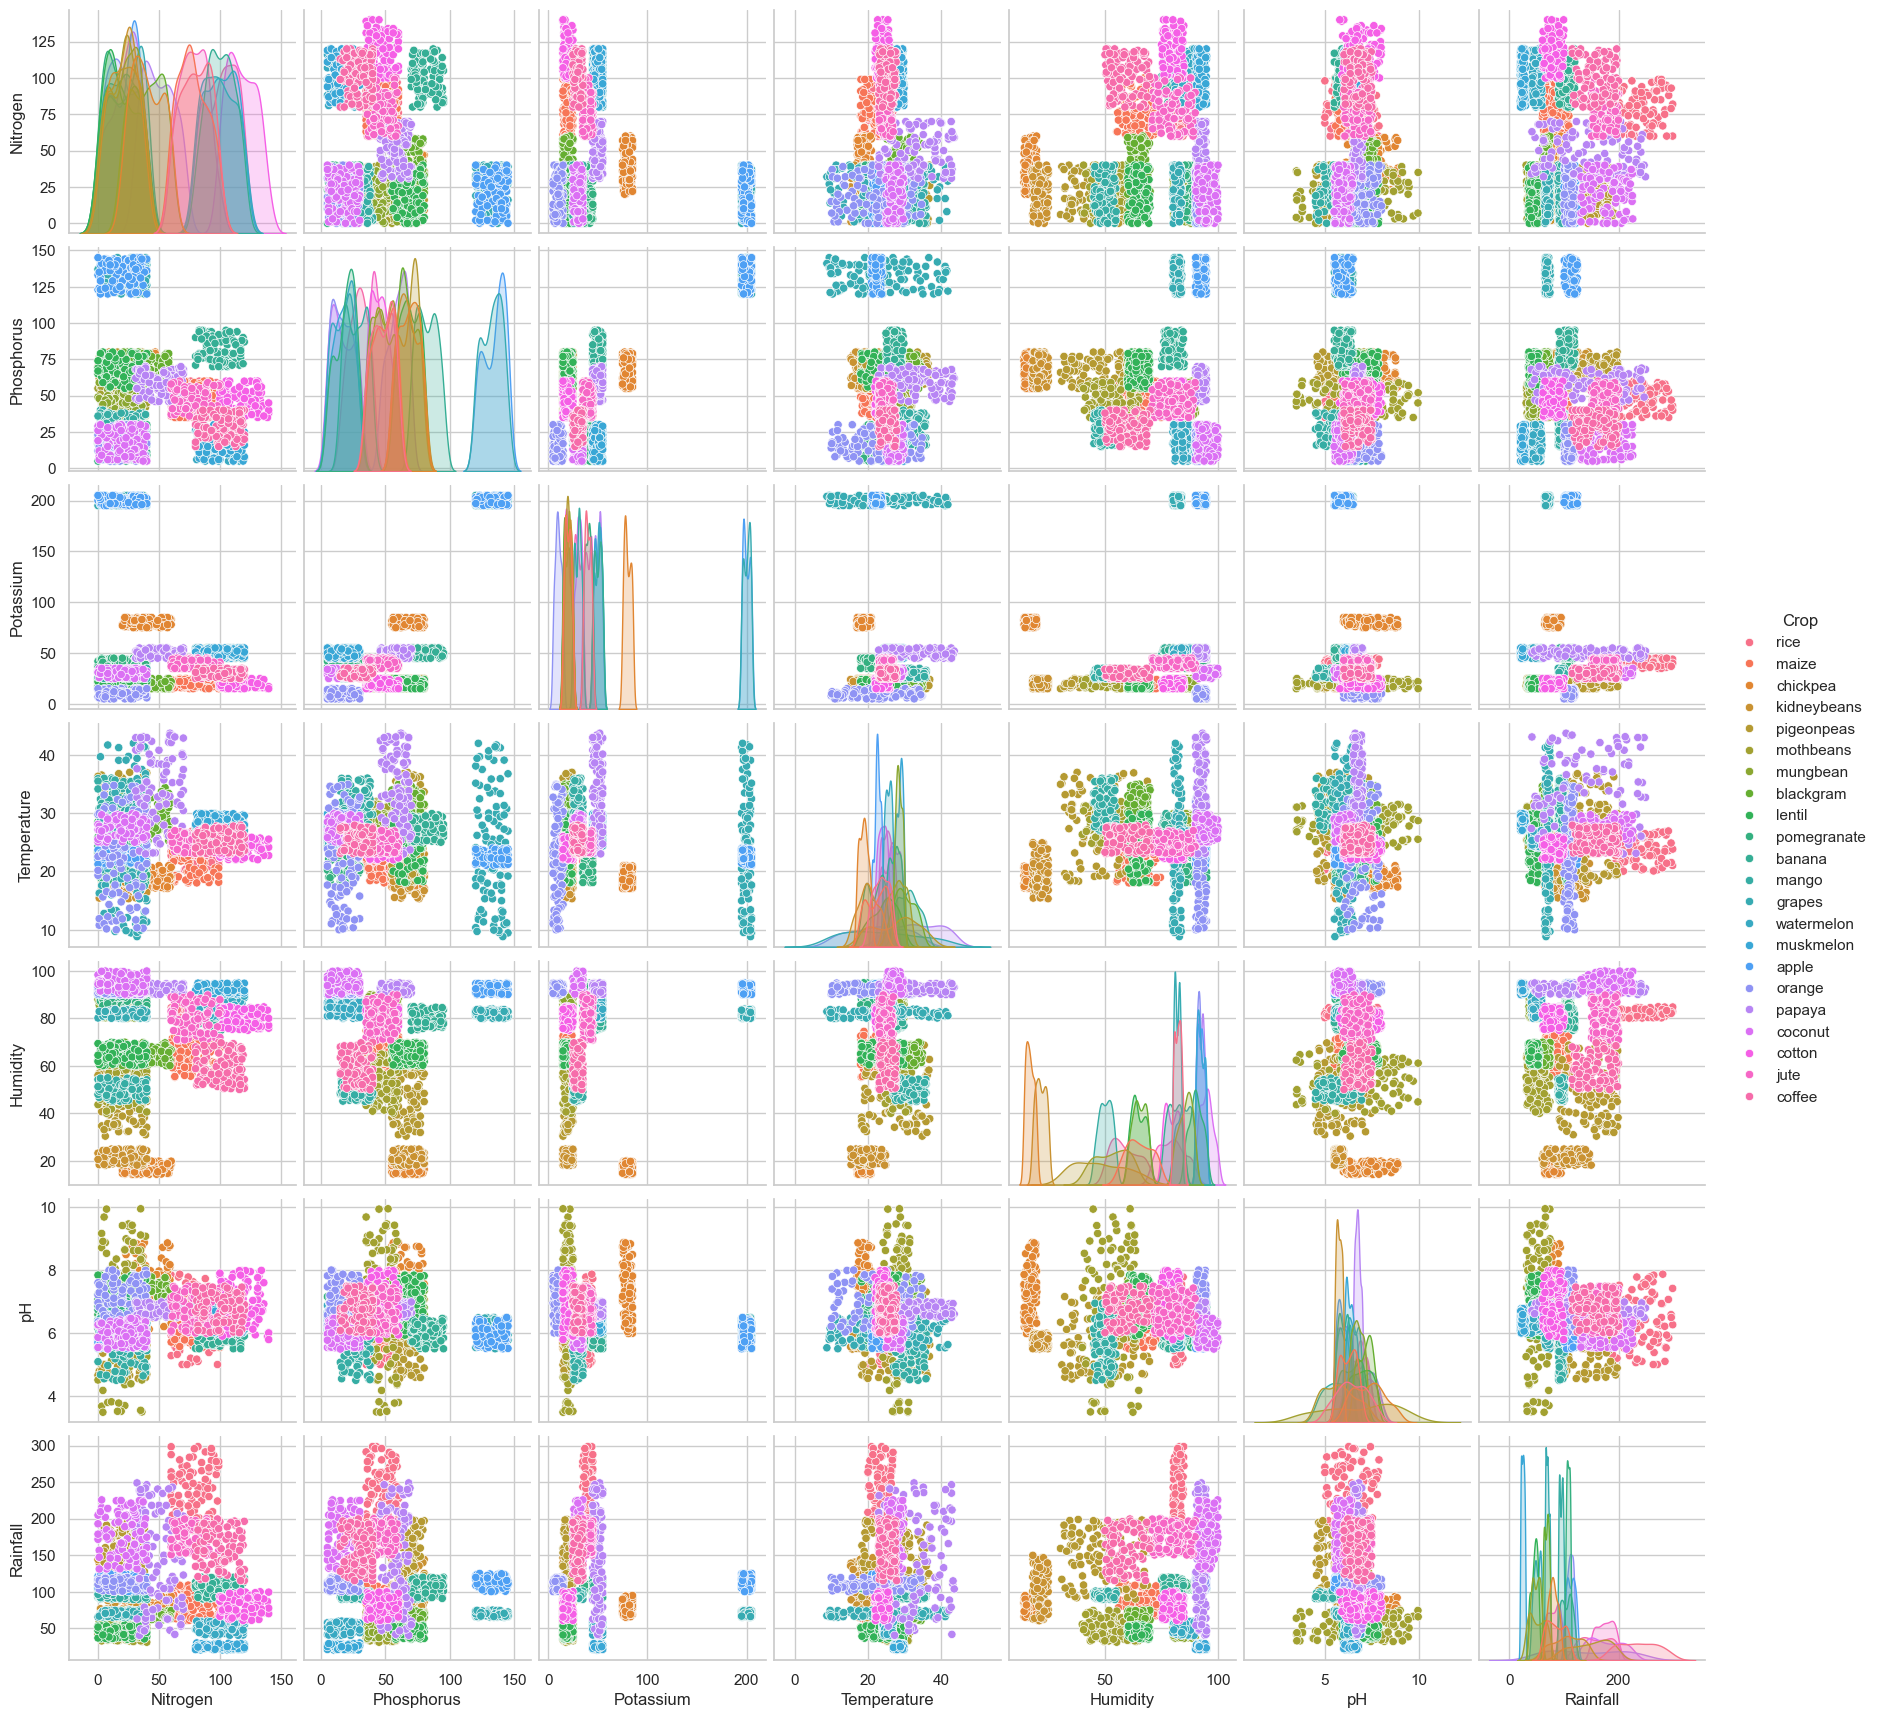

In [65]:
# Visualization using pair plot
hue_variable = "Crop"
sns.pairplot(data_1, hue = hue_variable)
plt.show()

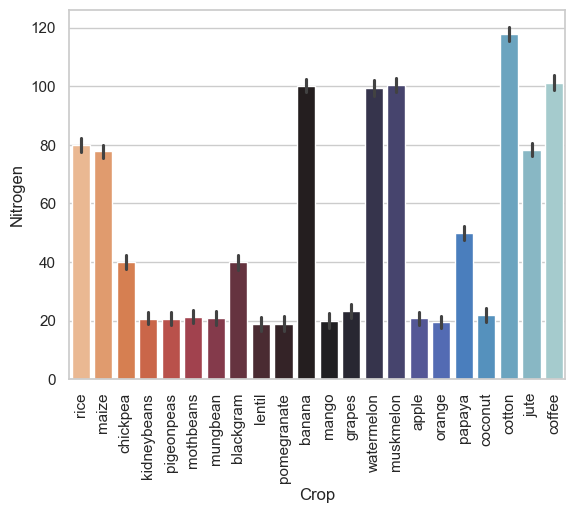

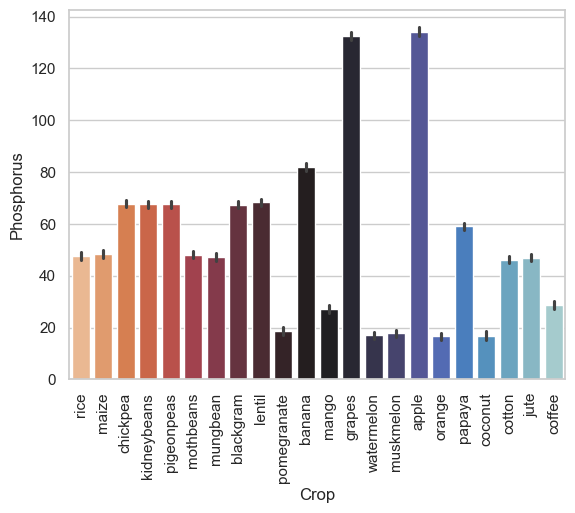

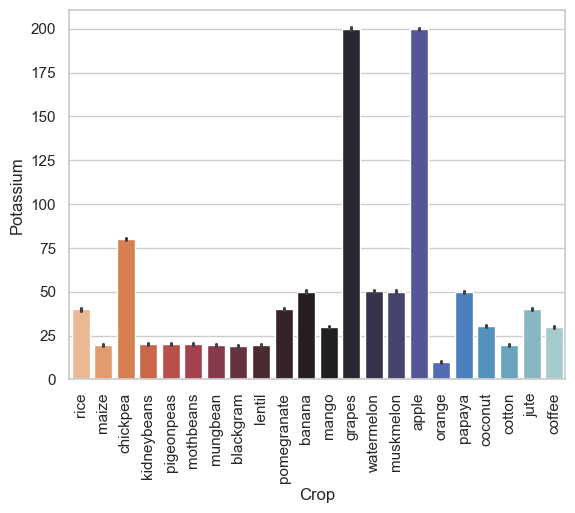

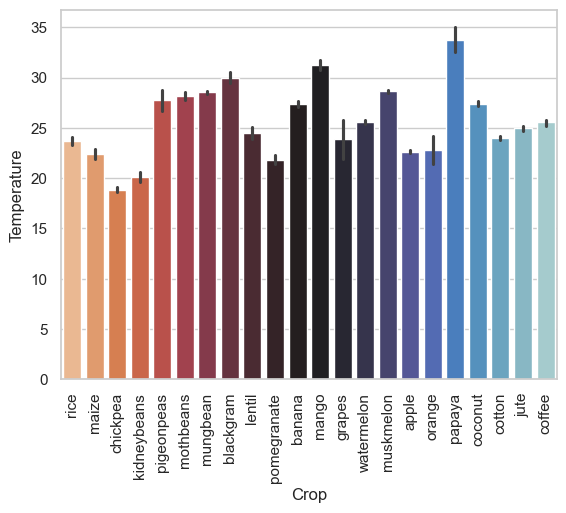

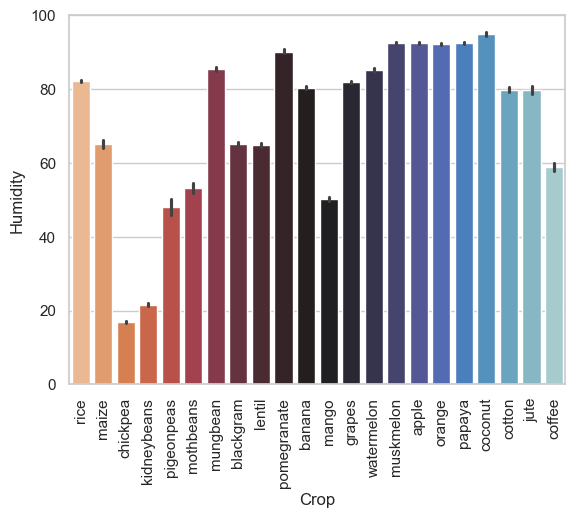

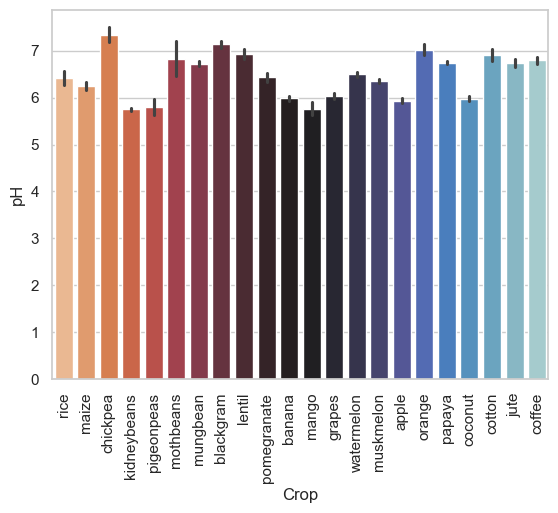

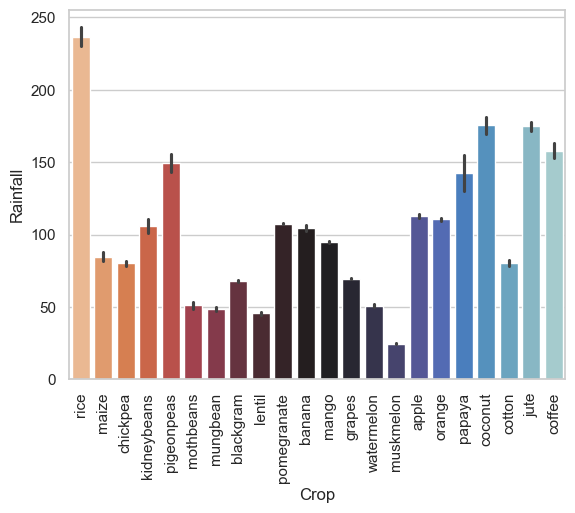

In [66]:
# Visualization using Bar Chart
data_columns = ['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'pH', 'Rainfall']
for i in data_columns:
    sns.barplot(x = 'Crop',y = i , data = data_1, palette = "icefire_r")
    plt.xticks(rotation = 90)
    plt.show()

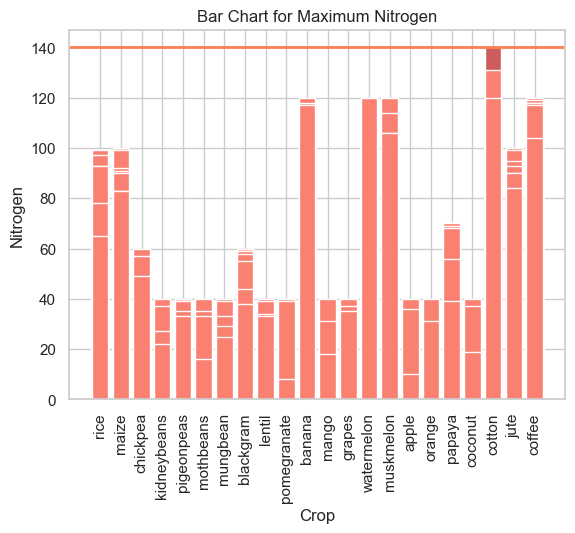

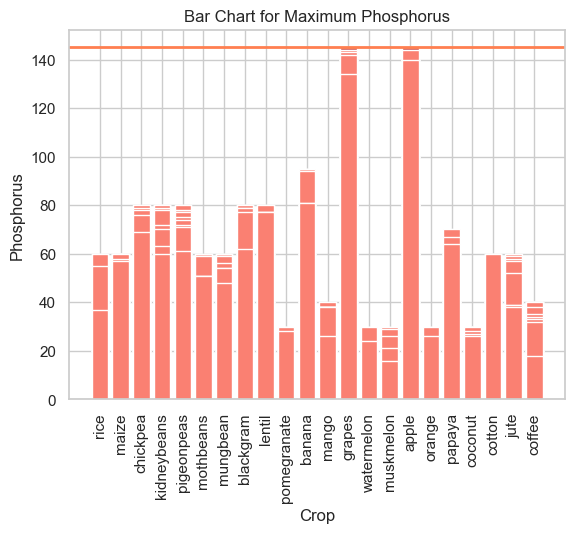

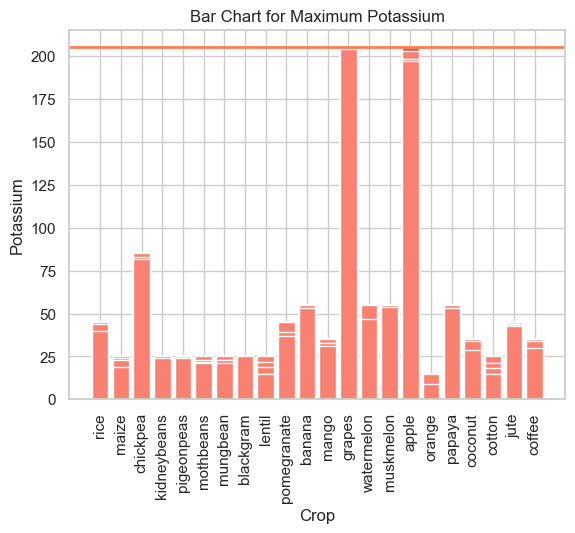

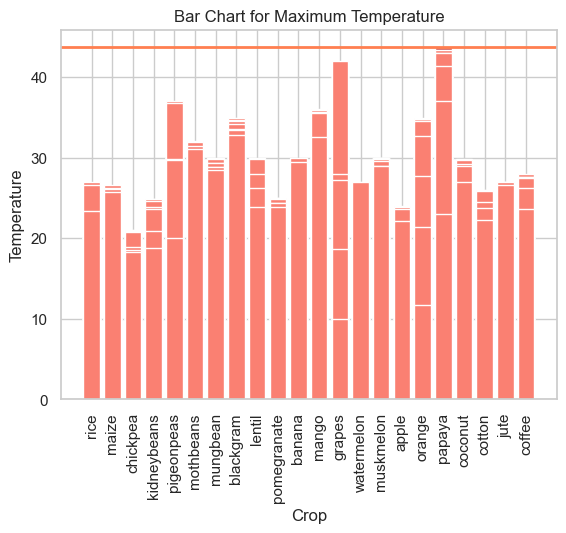

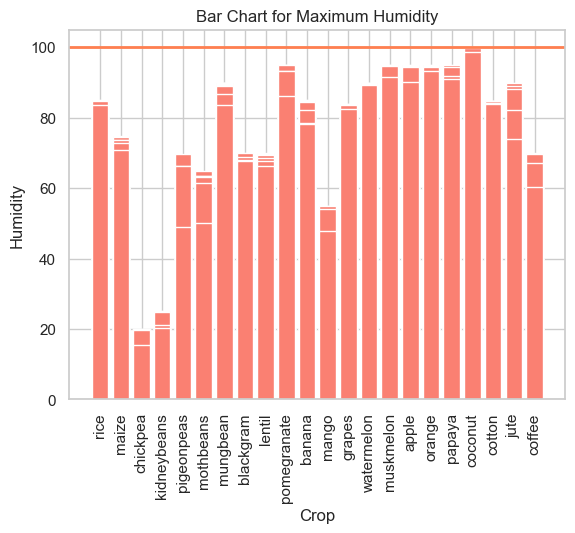

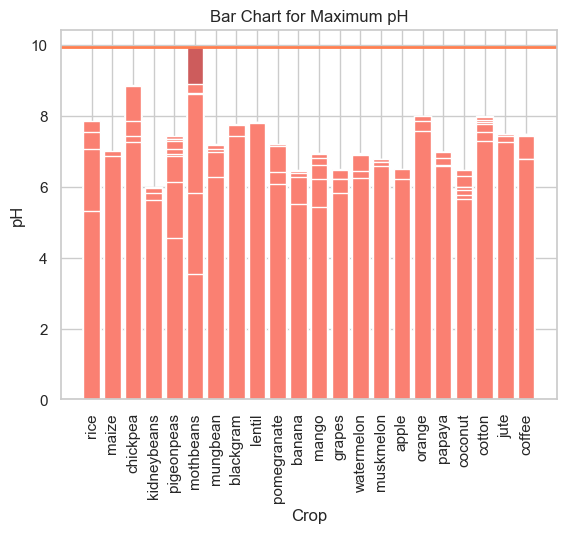

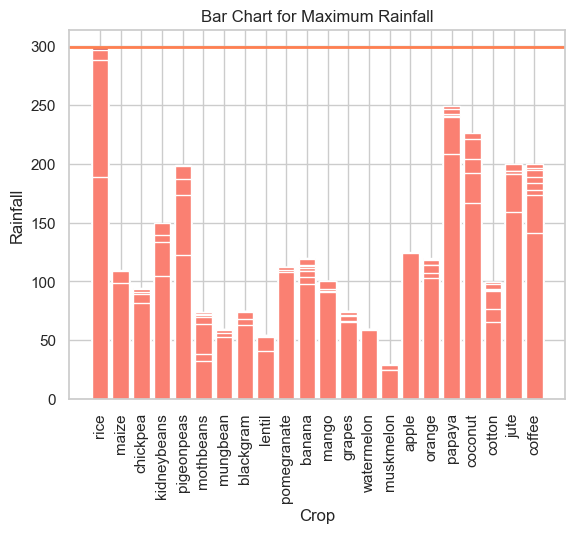

In [67]:
# Visualization using Bar Chart: Calculate the maximum value using Bar Chart
data_columns = ['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature','Humidity', 'pH', 'Rainfall']
for var in data_columns:
    maximum = data_1[var].max()
    plt.bar(data_1['Crop'], data_1[var], color=['indianred' if val == maximum else 'salmon' for val in data_1[var]])
    plt.axhline(maximum, color='coral', linewidth=2)
    plt.title(f'Bar Chart for Maximum {var}')
    plt.xlabel('Crop')
    plt.ylabel(var)
    plt.xticks(rotation = 90)
    plt.show()

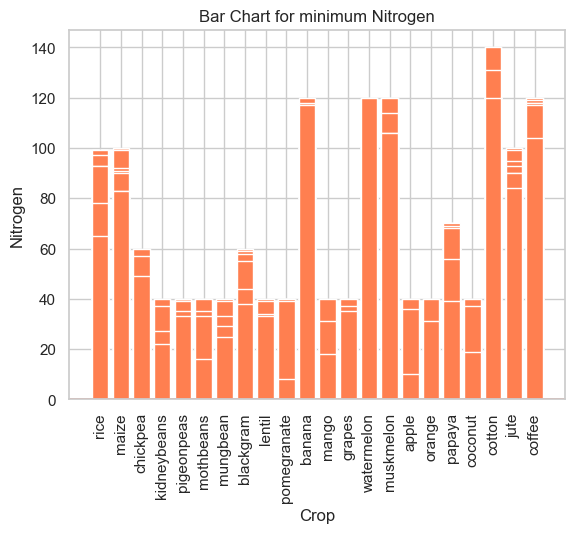

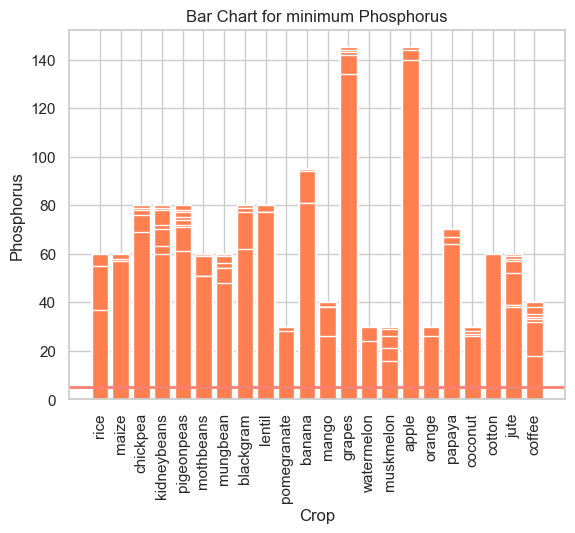

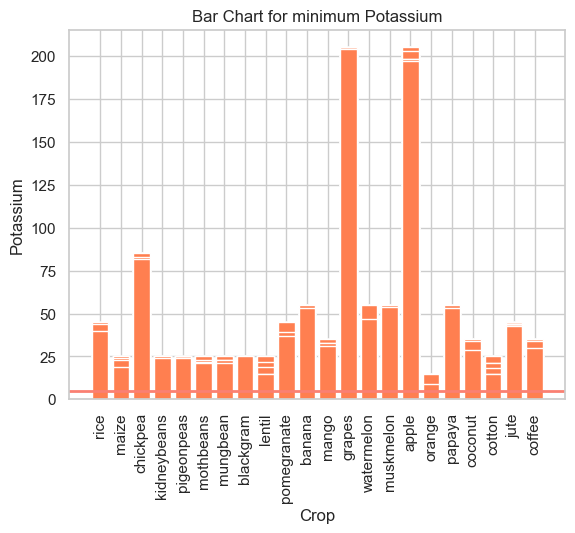

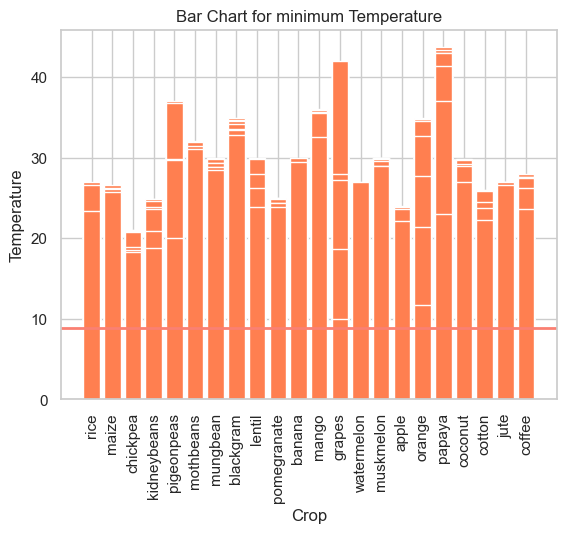

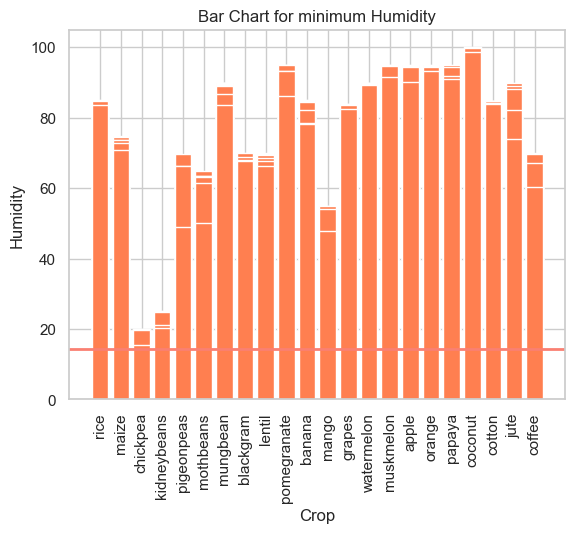

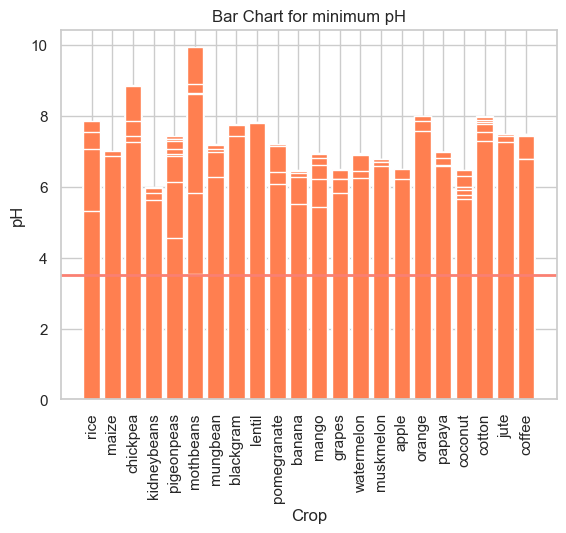

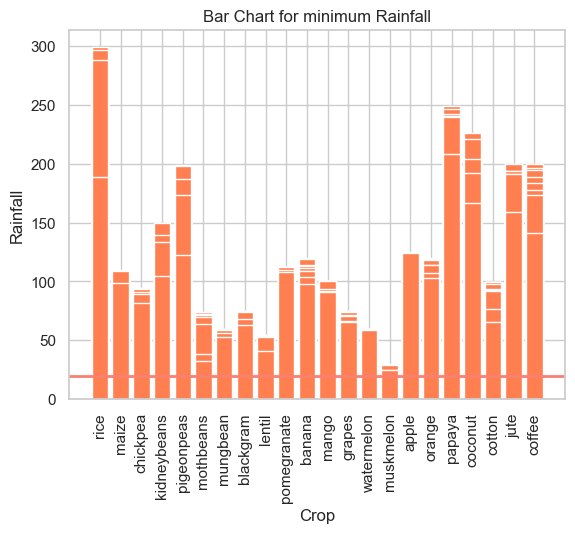

In [68]:
# Visualization using Bar Chart: Calculate the minimum value using Bar Chart 
data_columns = ['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature','Humidity', 'pH', 'Rainfall']
for var in data_columns:
    minimum = data_1[var].min()
    plt.bar(data_1['Crop'], data_1[var], color=['indianred' if val == minimum else 'coral' for val in data_1[var]])
    plt.axhline(minimum, color='salmon', linewidth=2)
    plt.title(f'Bar Chart for minimum {var}')
    plt.xlabel('Crop')
    plt.ylabel(var)
    plt.xticks(rotation = 90)
    plt.show()

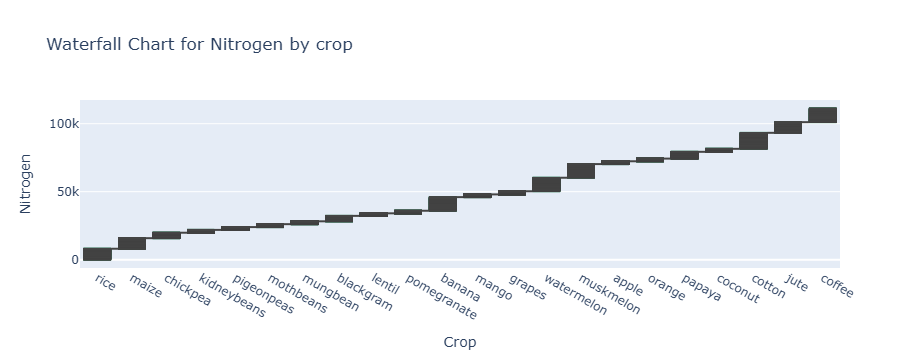

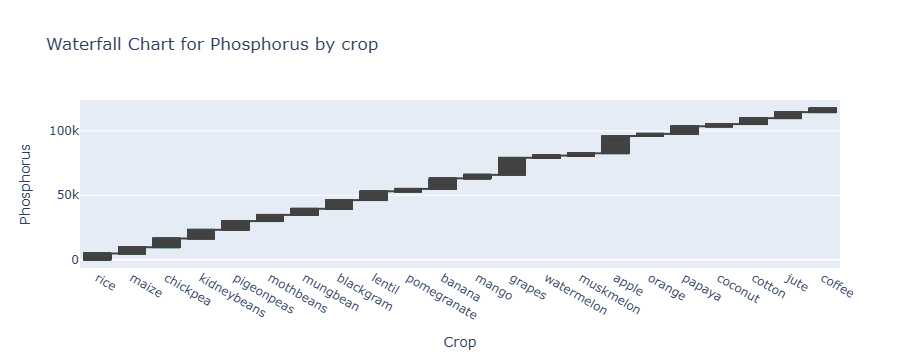

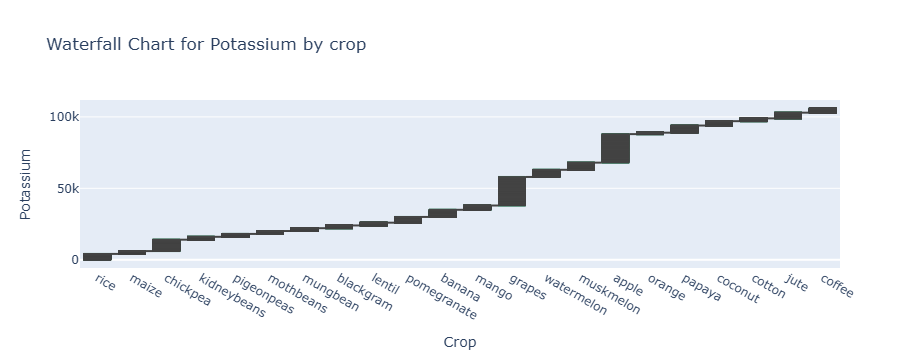

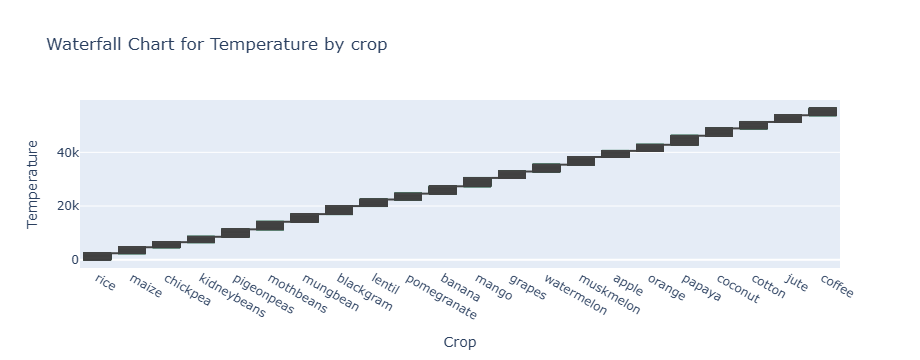

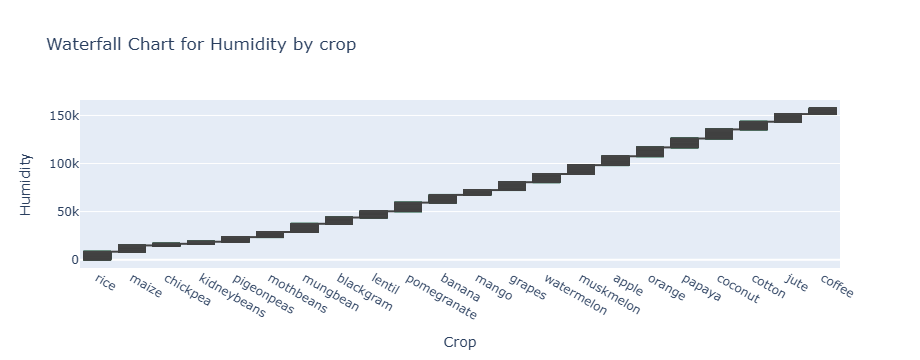

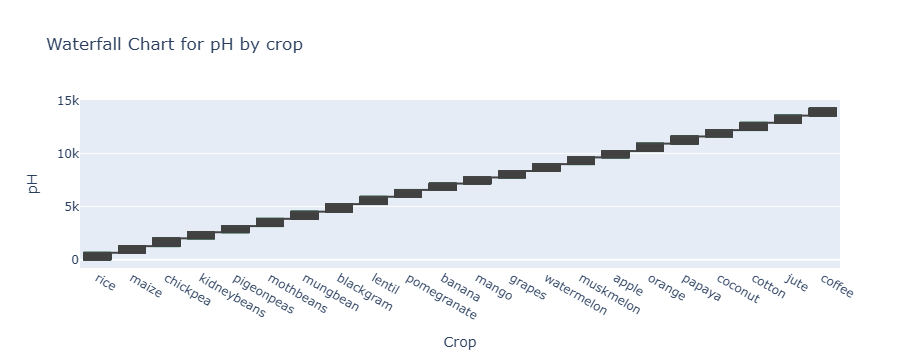

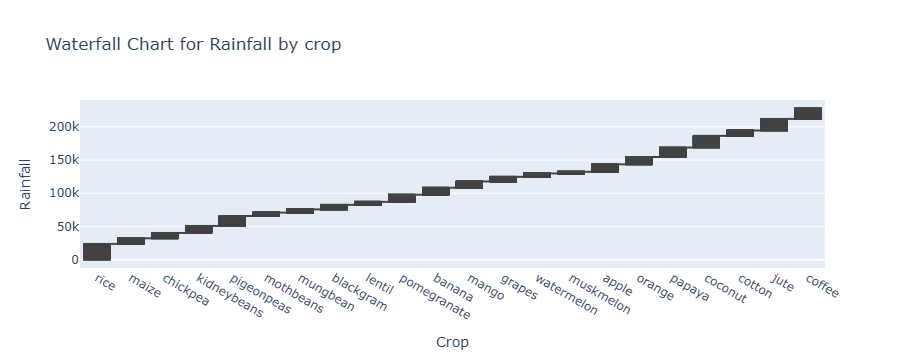

In [69]:
# Visualization using Waterfall Chart
data_columns = ['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'pH', 'Rainfall']
for i in data_columns:
    x = data_1["Crop"]
    y = data_1[i]
    mean = data_1[i].mean()
    trace = go.Waterfall(x = x, y = y, base = mean, textposition = 'outside',)
    layout = go.Layout(title = f'Waterfall Chart for {i} by crop', xaxis = dict(title='Crop'),
                       yaxis = dict(title=i),)
    fig = go.Figure(data=[trace], layout=layout)
    fig.show()

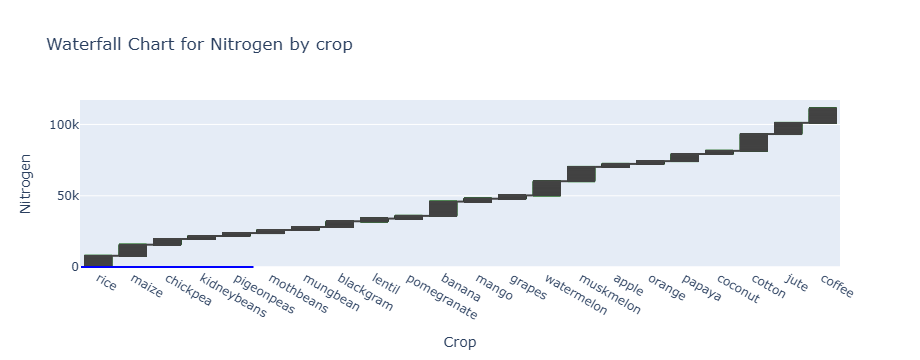

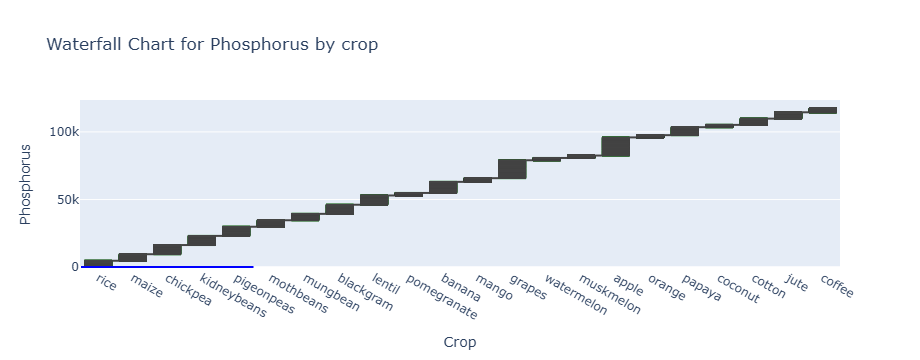

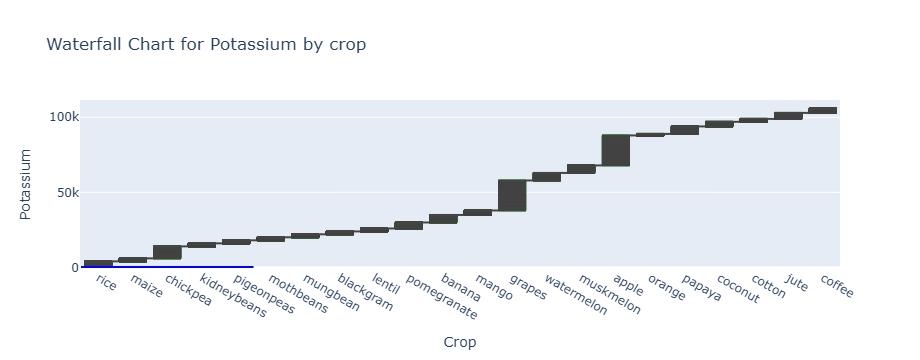

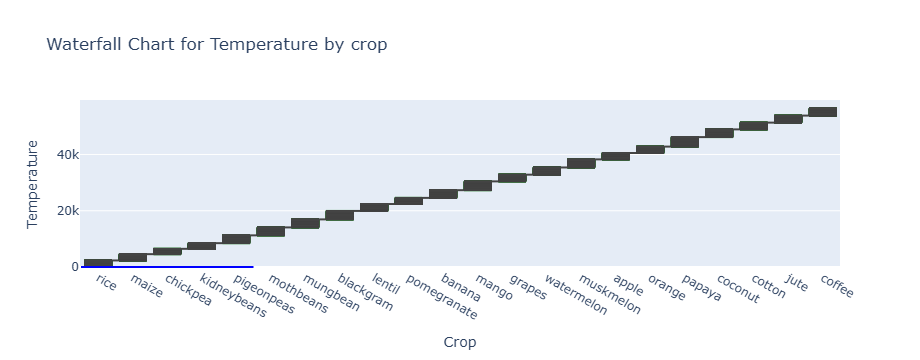

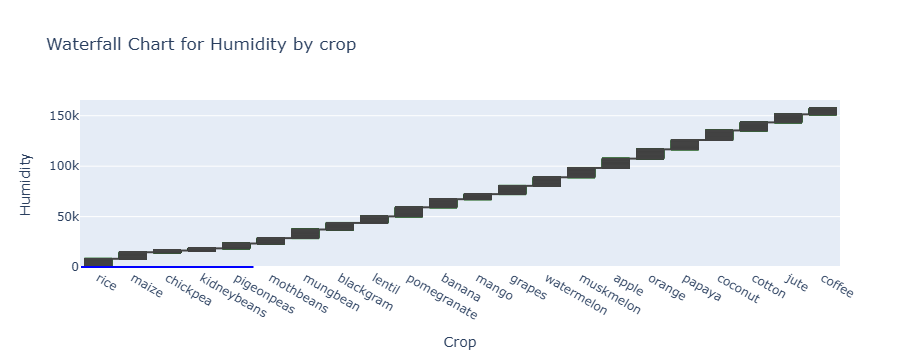

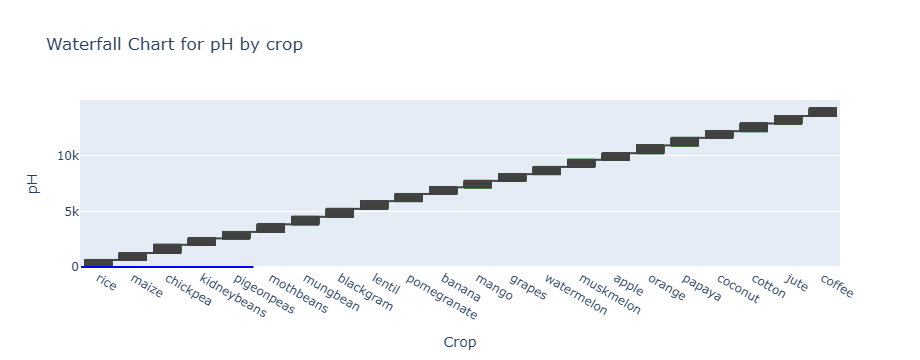

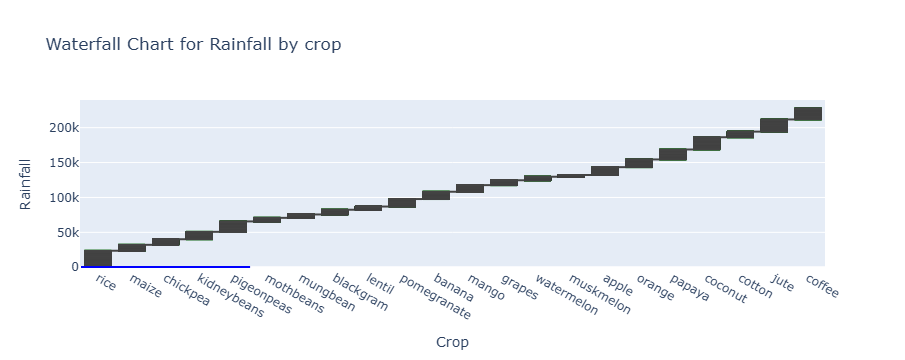

In [70]:
# Visualization using Waterfall Chart
data_columns = ['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'pH', 'Rainfall']
for i in data_columns:
    x = data_1["Crop"]
    y = data_1[i]
    maximum = data_1[i].max()
    trace = go.Waterfall(x = x,y = y,base = 0,textposition = 'outside',increasing = dict(marker=dict(color='green')),
                         decreasing = dict(marker=dict(color='red')),)
    layout = go.Layout(title = f'Waterfall Chart for {i} by crop', xaxis = dict(title='Crop'), 
                       yaxis = dict(title=i))
    layout.update({'shapes': [{'type': 'line','x0': -0.5, 'y0': maximum,'x1': 4.5,'y1': maximum,
                               'line': dict(color='blue', width=2)}]})
    fig = go.Figure(data=[trace], layout=layout)
    fig.show()

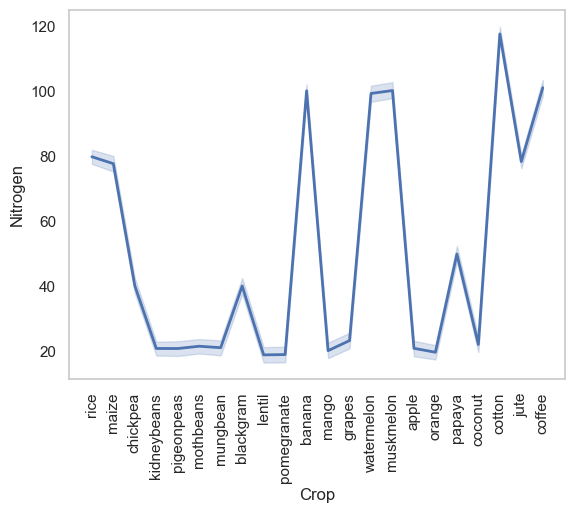

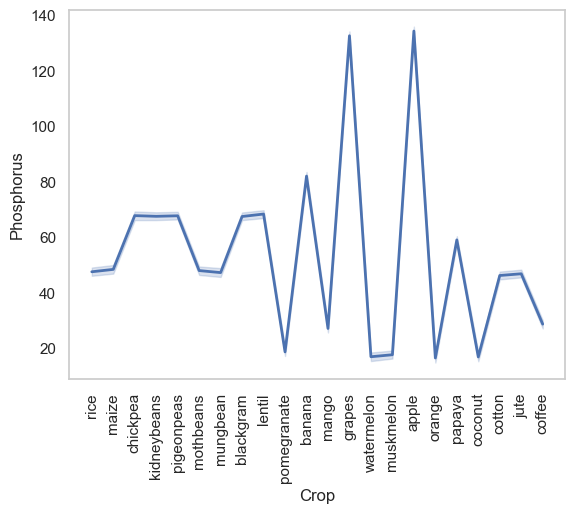

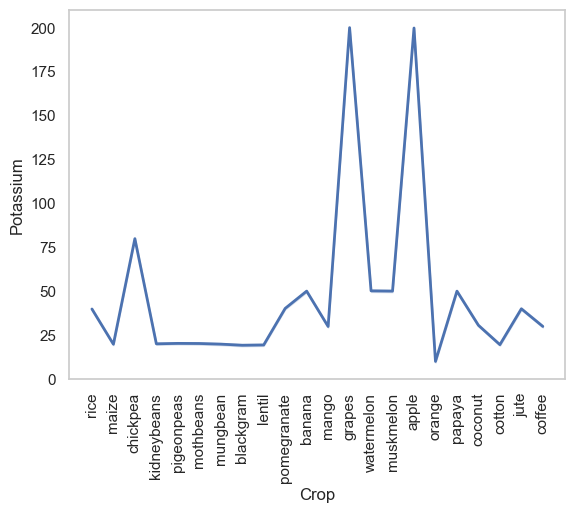

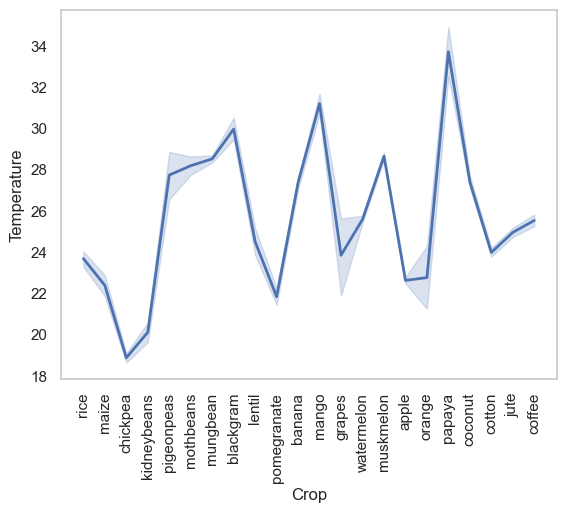

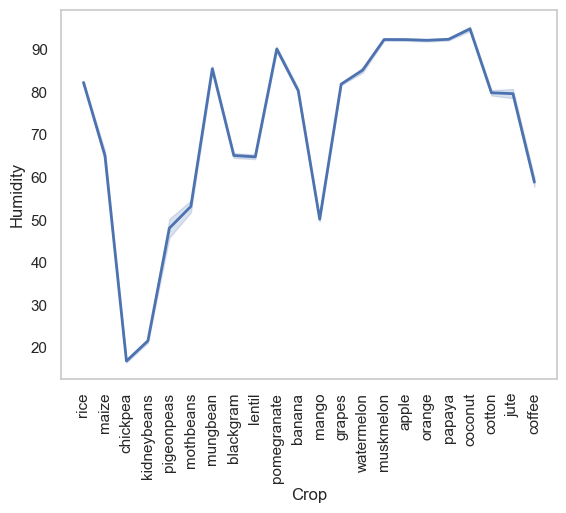

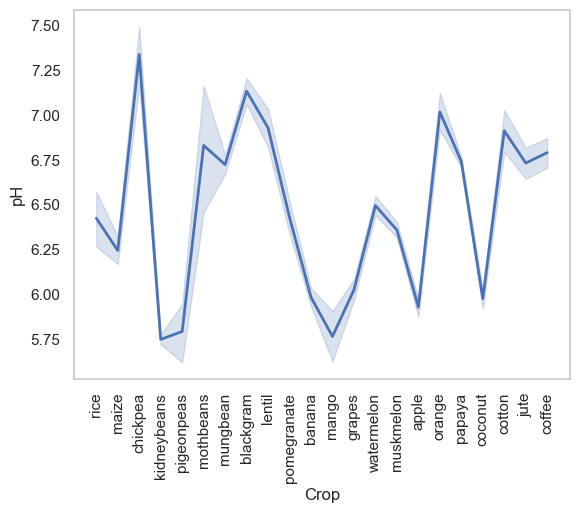

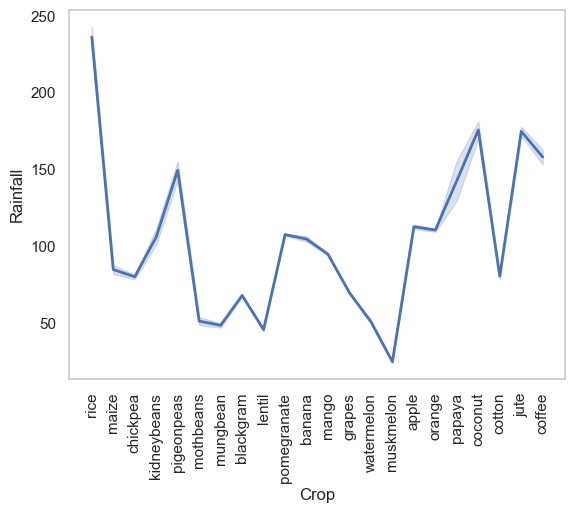

In [71]:
# Visualization using Line Chart
data_columns = ['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'pH', 'Rainfall']
for i in data_columns:
    sns.lineplot(x = 'Crop', y = i, data = data_1, linewidth = 2)
    plt.xticks(rotation = 90)
    plt.grid(False)
    plt.show()

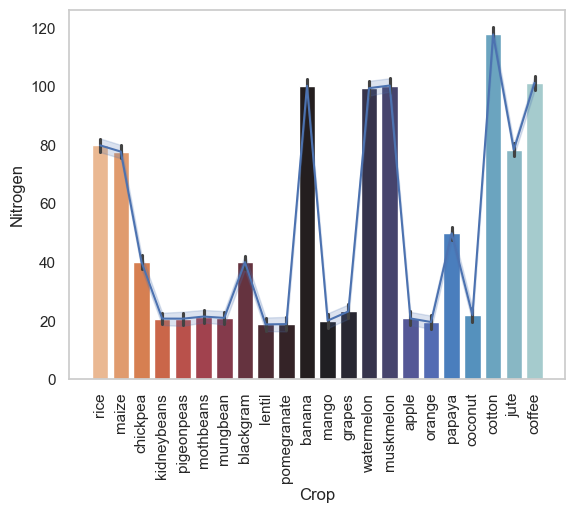

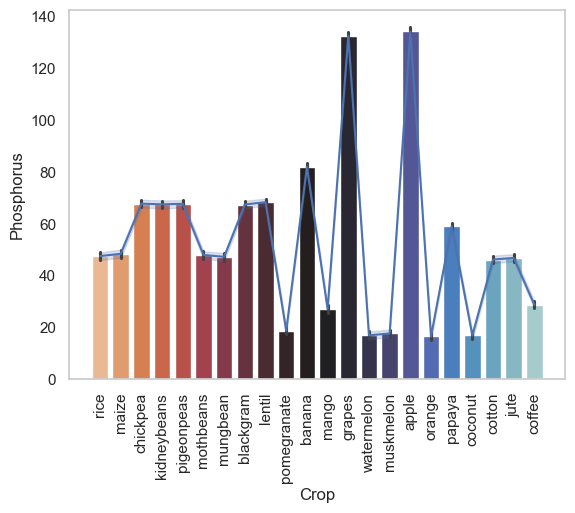

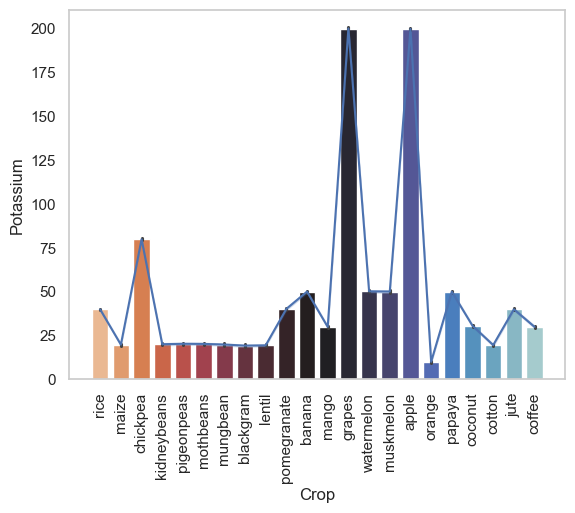

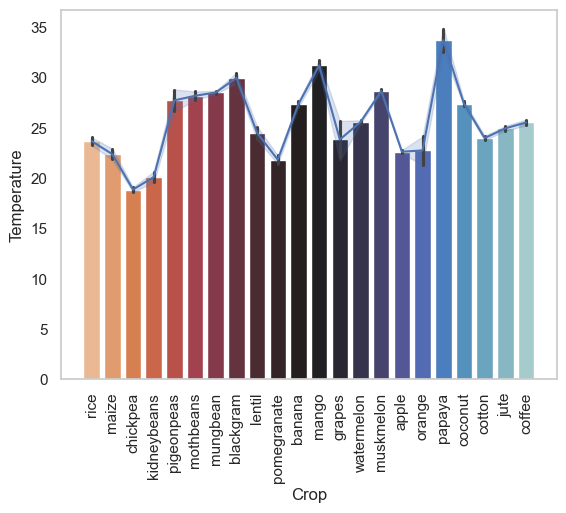

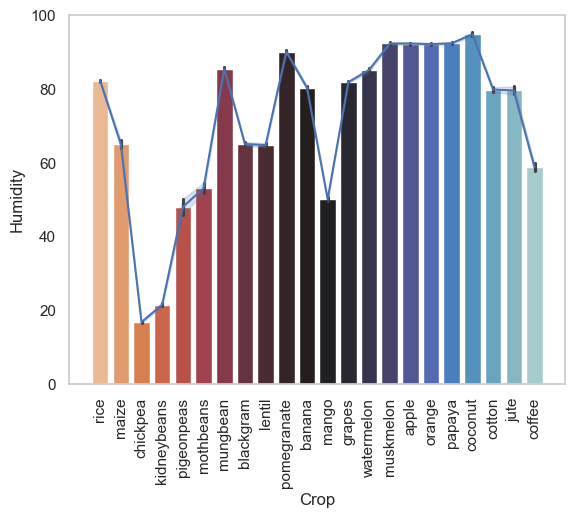

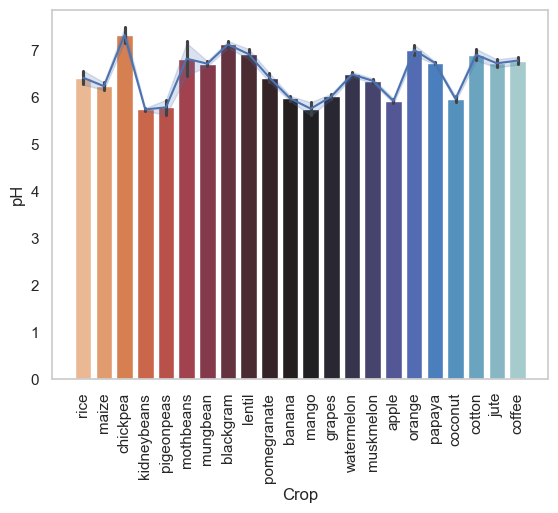

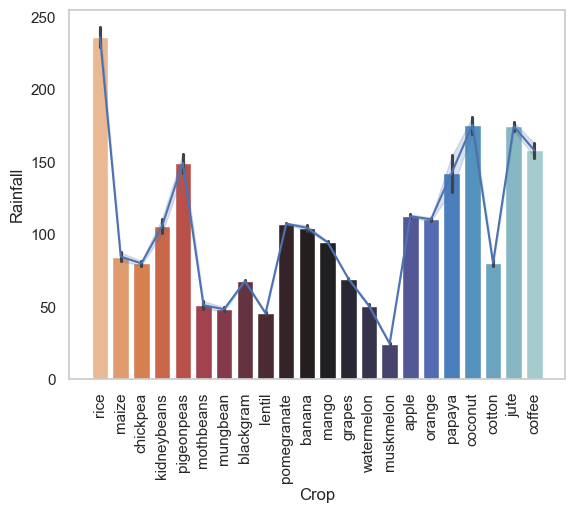

In [72]:
# Visualization using Line Chart & bar chart
data_columns = ['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'pH', 'Rainfall']
for i in data_columns:
    sns.barplot(x = 'Crop',y = i , data = data_1, palette = "icefire_r")
    sns.lineplot(x = 'Crop',y = i , data = data_1)
    plt.xticks(rotation = 90)
    plt.grid(False)
    plt.show()

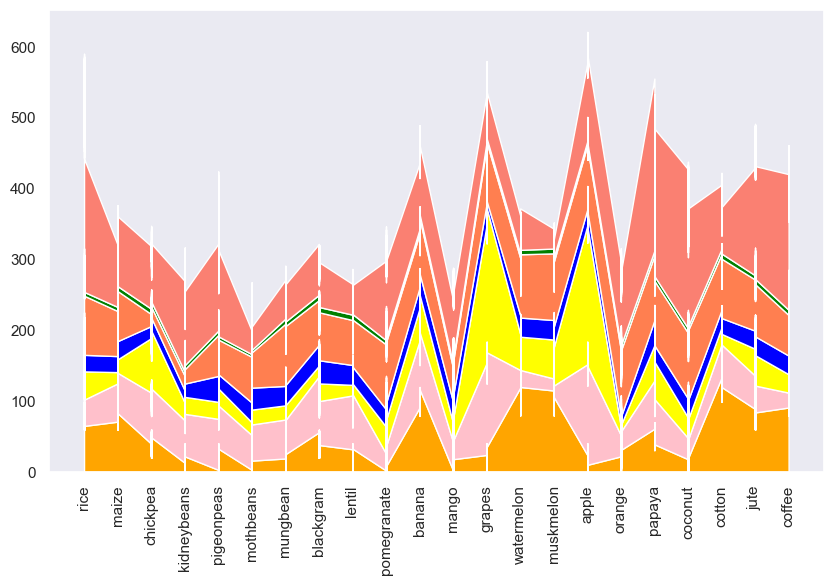

In [73]:
# Visualization using Area Chart
sns.set_theme()
color_map = ['orange', 'pink', "yellow", "blue", "coral", "green", "salmon"]
plt.figure(figsize = (10,6))
plt.stackplot(data_1.Crop, data_1.Nitrogen, data_1.Phosphorus, data_1.Potassium, data_1.Temperature, 
              data_1.Humidity, 
              data_1.pH, data_1.Rainfall, labels = ['Nitrogen', 'Phosphorus', 'Potassium', 
                                                    'Temperature', 'Humidity', 'pH', 'Rainfall'],
              colors=color_map)
plt.xticks(rotation = 90)
plt.grid(False)
plt.show()

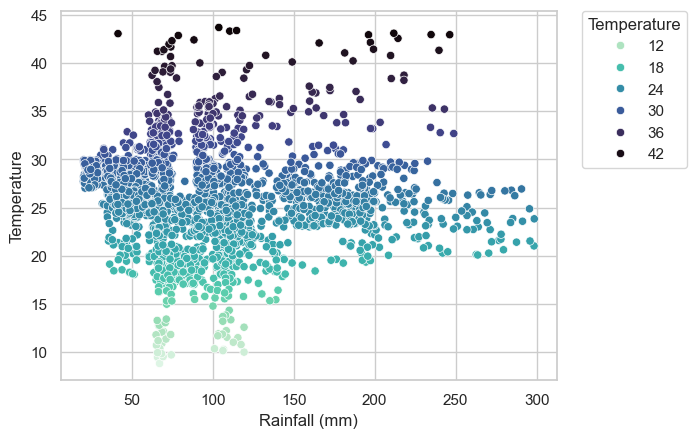

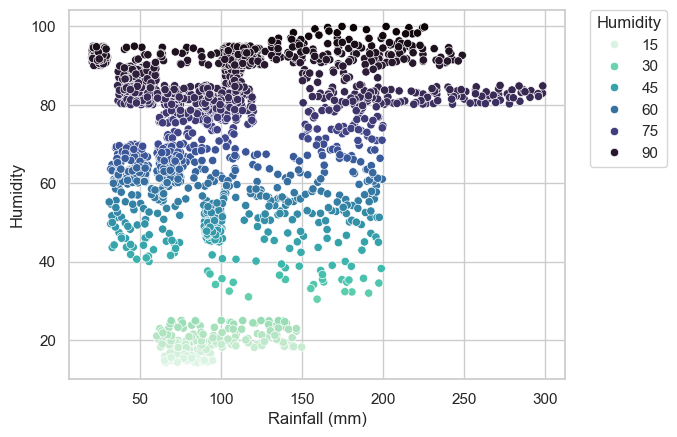

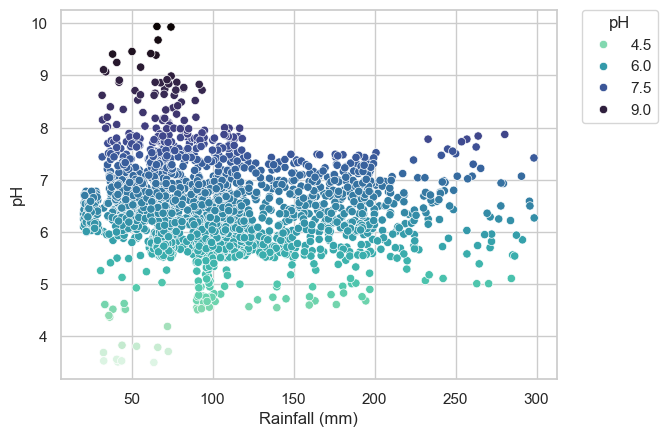

In [74]:
# Visualization using Scatter plot
data_col = ["Temperature", "Humidity", "pH"]
for i in data_col:
    sns.set(style='whitegrid')
    sns.scatterplot(x="Rainfall", y = i, hue = i, data=data_1, palette = "mako_r")
    plt.xlabel('Rainfall (mm)')
    plt.ylabel(i)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title = i)
    plt.show()

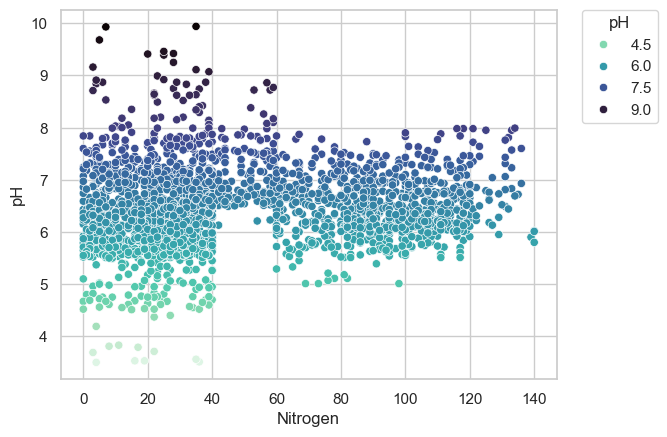

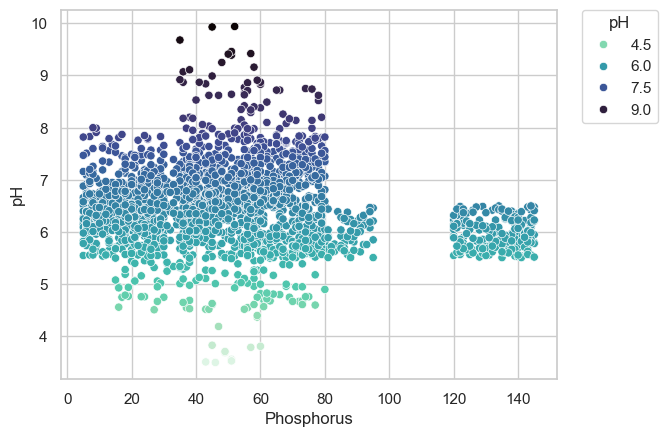

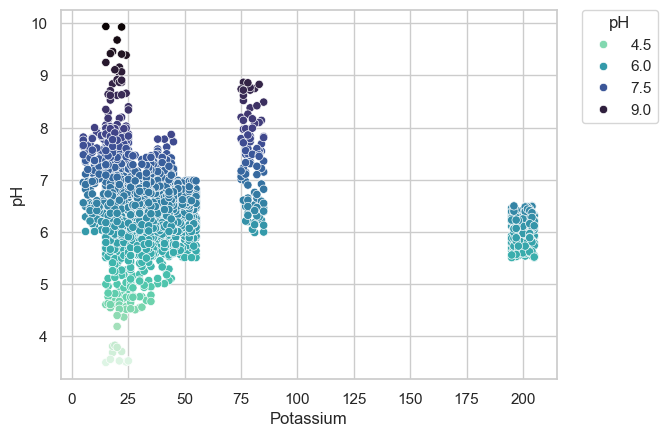

In [75]:
# Visualization using Scatter plot
data_columns = ['Nitrogen', 'Phosphorus', 'Potassium']
for i in data_columns:
    sns.set(style='whitegrid')
    sns.scatterplot(x = i, y="pH", hue="pH", data=data_1, palette = "mako_r")
    plt.xlabel(i)
    plt.ylabel('pH')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title = "pH")
    plt.show()

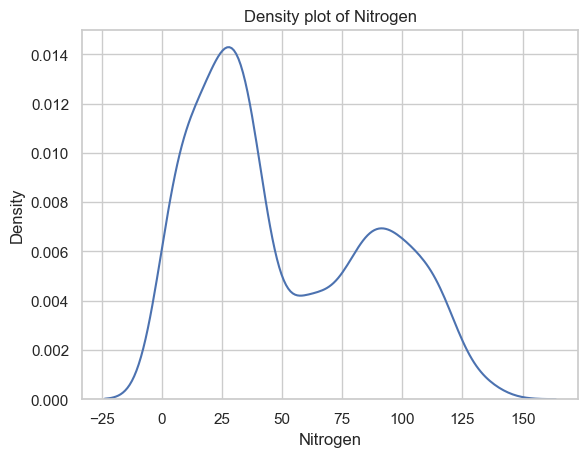

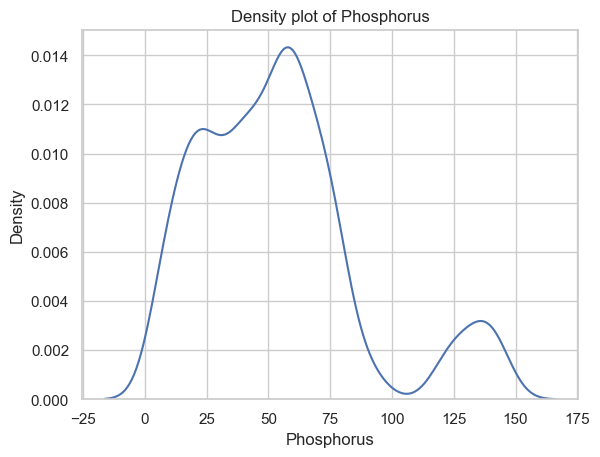

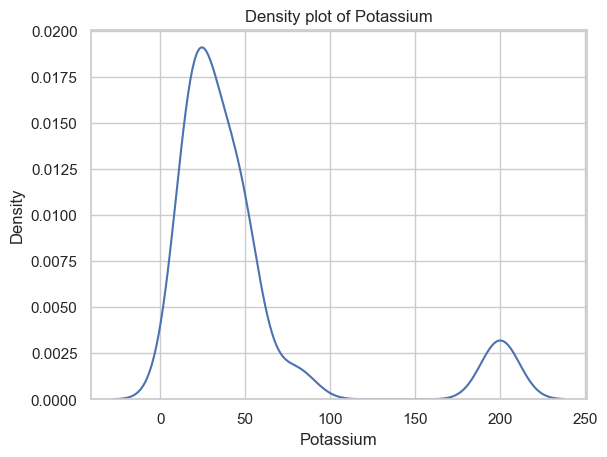

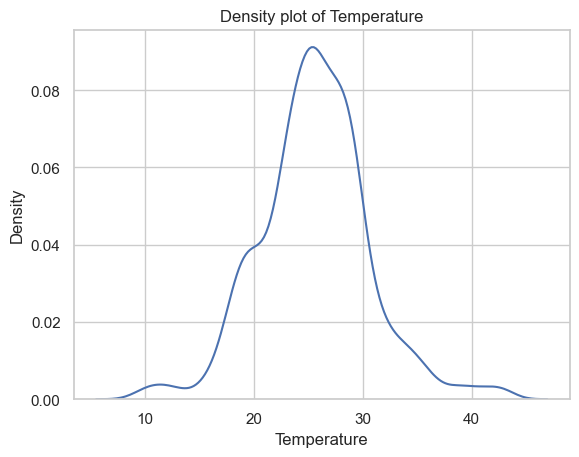

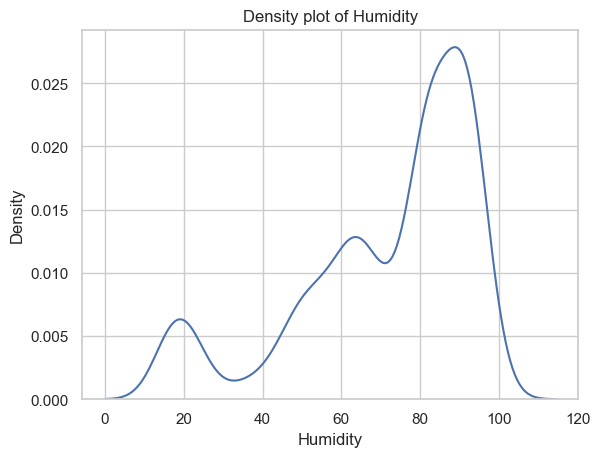

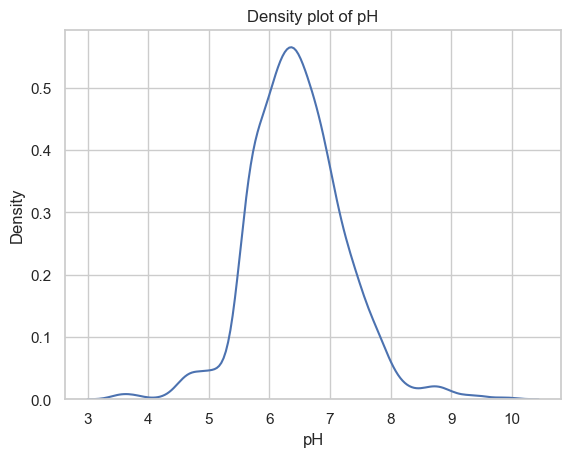

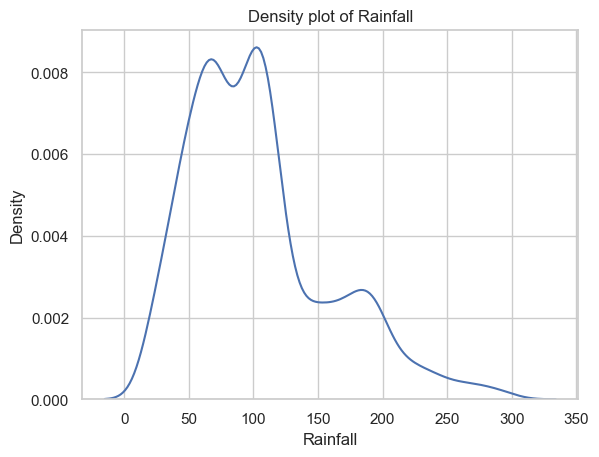

In [76]:
# Visualization using Density plot
data_columns = ['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'pH', 'Rainfall']
for var in data_columns:
    fig, ax = plt.subplots()
    sns.kdeplot(x = var, data=data_1)
    ax.set_title('Density plot of ' + var)
    plt.show()

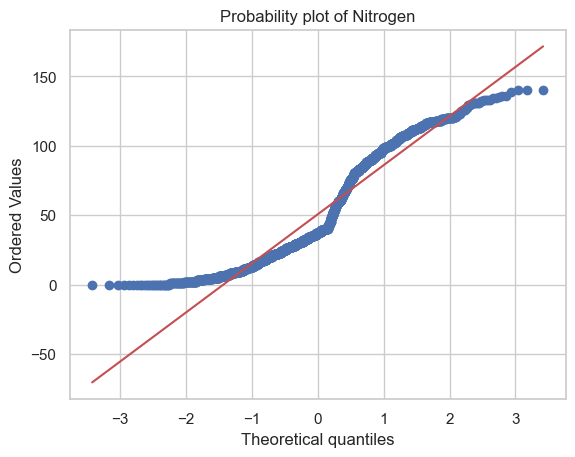

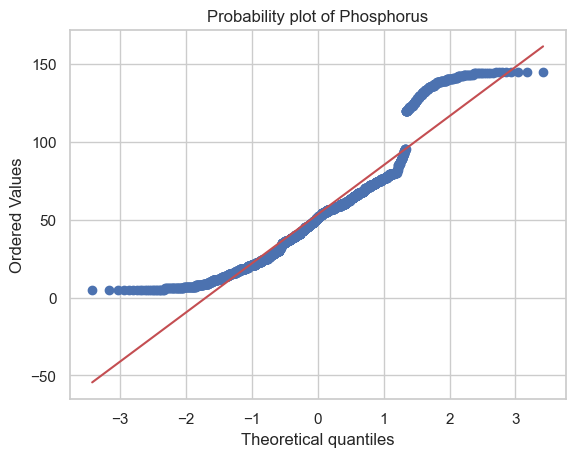

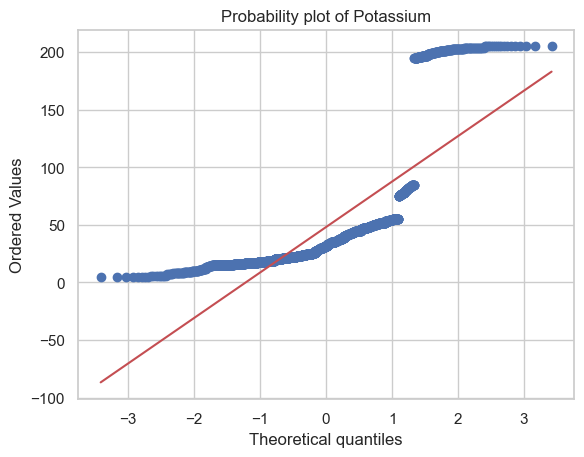

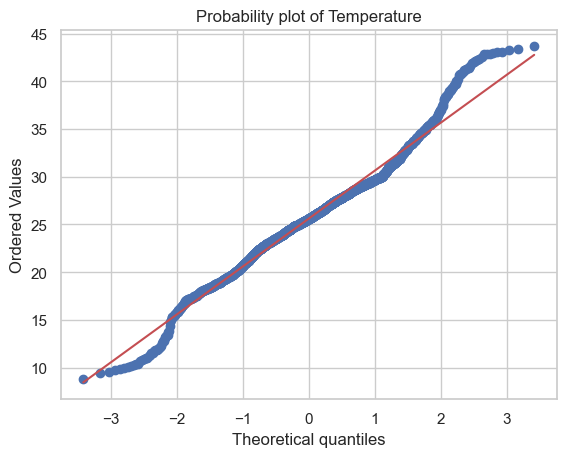

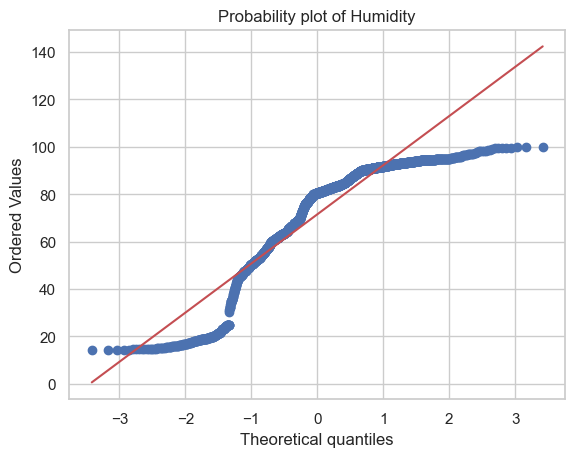

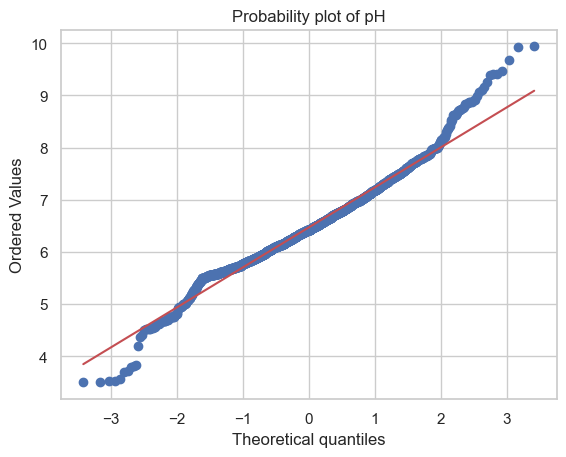

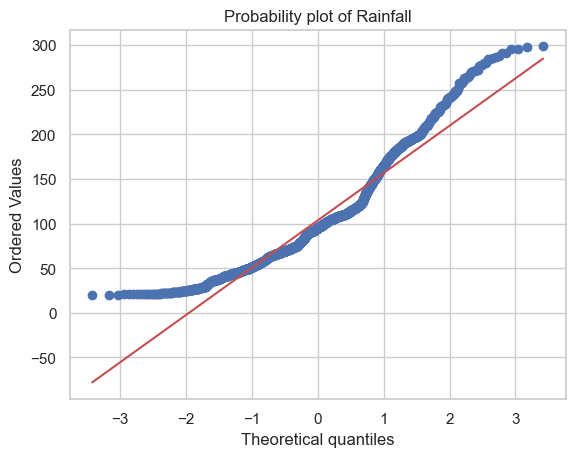

In [77]:
# Normality test
data_columns = ['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'pH', 'Rainfall']
for var in data_columns:
    fig, ax = plt.subplots()
    stats.probplot(data_1[var], dist = "norm", plot=ax)
    ax.set_title('Probability plot of ' + var)
    plt.show()

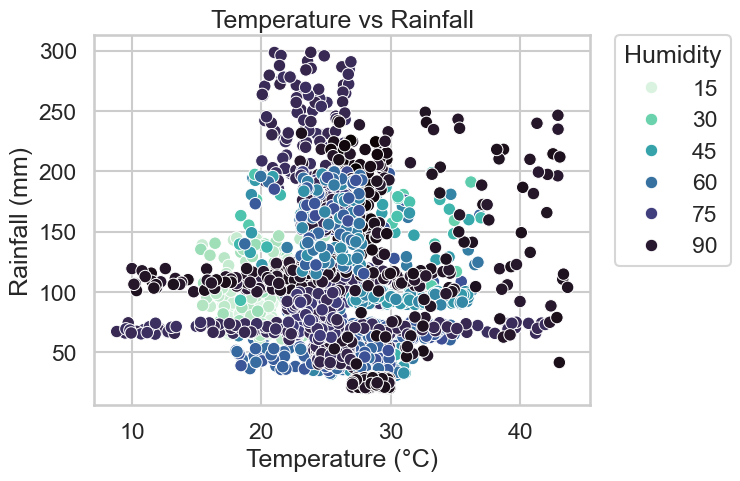

In [79]:
# Scatter plot - Relationship
sns.set(style = 'whitegrid')
sns.set_context('talk')
sns.scatterplot(x = "Temperature", y = "Rainfall", hue = "Humidity", data = data_1, palette = "mako_r")
plt.title('Temperature vs Rainfall')
plt.xlabel('Temperature (°C)')
plt.ylabel('Rainfall (mm)')
plt.legend(title = "Humidity", bbox_to_anchor = (1.05, 1), loc = 'upper left', borderaxespad = 0)
plt.show()

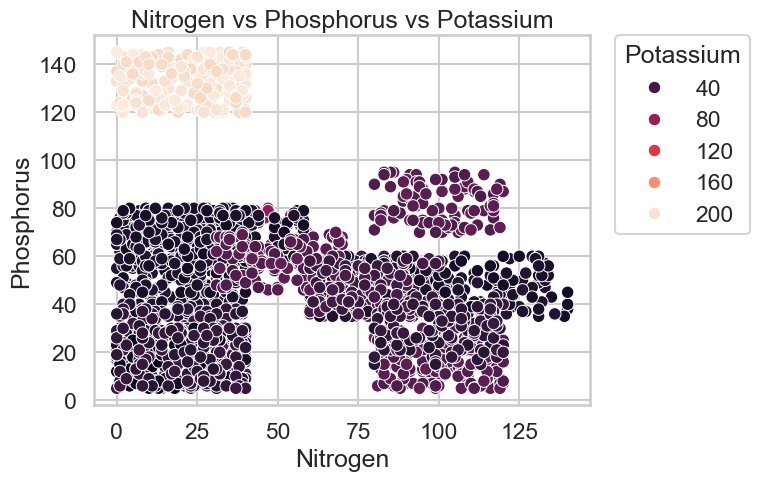

In [81]:
# Scatter Plot - Relationship
sns.set(style = 'whitegrid')
sns.set_context('talk')
sns.scatterplot(x = "Nitrogen", y = "Phosphorus", hue = "Potassium", data = data_1, palette = "rocket")
plt.title('Nitrogen vs Phosphorus vs Potassium')
plt.xlabel('Nitrogen')
plt.ylabel('Phosphorus')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title = "Potassium")
plt.show()

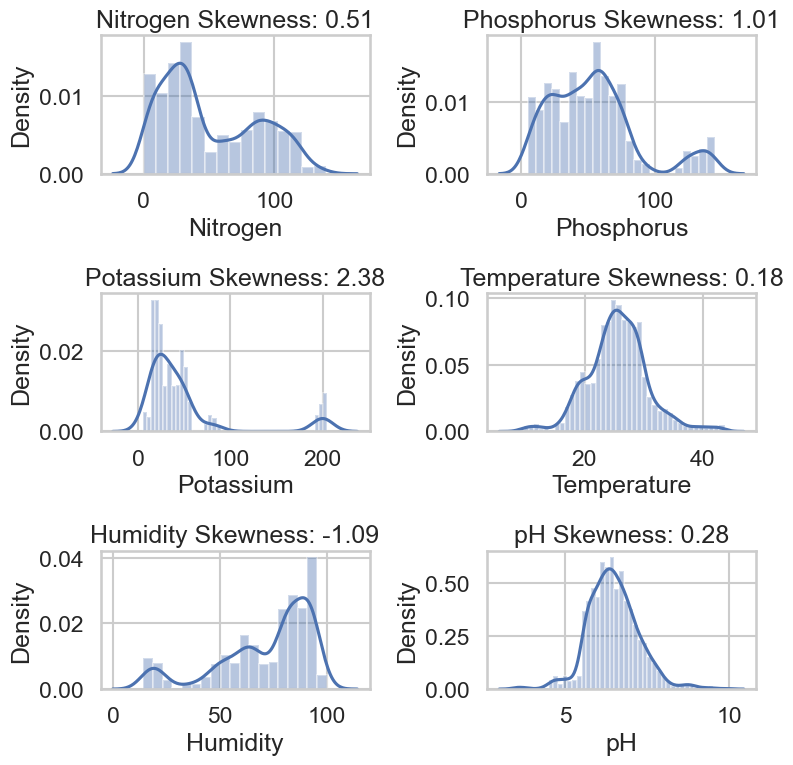

In [85]:
# Create a distribution plot of the skewness for each variable
skewness = data.skew()
fig, axs = plt.subplots(nrows = 3, ncols = 2, figsize = (8, 8))
axs = axs.ravel()
for i, col in enumerate(data.columns):
    sns.distplot(data_1[col], ax = axs[i])
    axs[i].set_title(f"{col} Skewness: {skewness[col]:.2f}")
    if i == 5:
        break  # exit loop after plotting the last valid column
plt.tight_layout()
plt.show()

In [97]:
# Calculate the P-value
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
p_matrix = data.corr(method = lambda x, y: pearsonr(x, y)[1])
p_matrix

Nitrogen    Phosphorus     Potassium   Temperature  \
Nitrogen     1.000000e+00  3.823471e-28  3.599057e-11  2.140381e-01   
Phosphorus   3.823471e-28  1.000000e+00  0.000000e+00  1.934742e-09   
Potassium    3.599057e-11  0.000000e+00  1.000000e+00  3.800049e-14   
Temperature  2.140381e-01  1.934742e-09  3.800049e-14  1.000000e+00   
Humidity     1.849665e-19  2.328358e-08  1.714122e-19  2.268010e-22   
pH           5.451793e-06  7.963562e-11  1.218069e-15  4.008797e-01   
Rainfall     5.620240e-03  2.738183e-03  1.214510e-02  1.583955e-01   

                 Humidity            pH      Rainfall  
Nitrogen     1.849665e-19  5.451793e-06  5.620240e-03  
Phosphorus   2.328358e-08  7.963562e-11  2.738183e-03  
Potassium    1.714122e-19  1.218069e-15  1.214510e-02  
Temperature  2.268010e-22  4.008797e-01  1.583955e-01  
Humidity     1.000000e+00  6.902269e-01  9.164192e-06  
pH           6.902269e-01  1.000000e+00  2.854527e-07  
Rainfall     9.164192e-06  2.854527e-07  1.000000e+00

In [88]:
# Calculate the Pearson correlation coefficient
features = ['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'pH', 'Rainfall']
pearson_corr = data[features].corr(method='pearson')
pearson_corr

Nitrogen  Phosphorus  Potassium  Temperature  Humidity        pH  \
Nitrogen     1.000000   -0.231460  -0.140512     0.026501  0.190687  0.096761   
Phosphorus  -0.231460    1.000000   0.736232    -0.127538 -0.118732 -0.138022   
Potassium   -0.140512    0.736232   1.000000    -0.160389  0.190860 -0.169477   
Temperature  0.026501   -0.127538  -0.160389     1.000000  0.205326 -0.017919   
Humidity     0.190687   -0.118732   0.190860     0.205326  1.000000 -0.008502   
pH           0.096761   -0.138022  -0.169477    -0.017919 -0.008502  1.000000   
Rainfall     0.059021   -0.063840  -0.053461    -0.030082  0.094418 -0.109167   

             Rainfall  
Nitrogen     0.059021  
Phosphorus  -0.063840  
Potassium   -0.053461  
Temperature -0.030082  
Humidity     0.094418  
pH          -0.109167  
Rainfall     1.000000